# Library

In [1]:
import os,glob
import tensorflow as tf
import numpy as np

from scipy import signal, fftpack
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
load = "E:/Sekolah/Telkom/TA/LTSM/"
save = "E:/Sekolah/Telkom/TA/LTSM/Img/"
files_csv =[]
for root, dirs, files in os.walk(load):
    for file_name in files:
        if file_name.endswith(".csv"):
            file_load = os.path.join(root, file_name)
            files_csv.append(file_load)

In [3]:
x = []
y = []
for file_csv in files_csv:
    print(f"Head dari file {file_csv}:")
    df = pd.read_csv(file_csv)
    x.append(df['X'])
    y.append(df['Y'])
    print(df.head())
    print("\n")

Head dari file E:/Sekolah/Telkom/TA/LTSM/30%\A301.csv:
          X         Y
0  5.000000 -0.035156
1  5.015625 -0.035156
2  5.031250 -0.039062
3  5.046875 -0.007812
4  5.062500  0.117188


Head dari file E:/Sekolah/Telkom/TA/LTSM/30%\A302.csv:
          X         Y
0  5.000000 -0.050781
1  5.015625 -0.054688
2  5.031250 -0.046875
3  5.046875 -0.039062
4  5.062500  0.117188


Head dari file E:/Sekolah/Telkom/TA/LTSM/30%\A303.csv:
          X         Y
0  5.000000 -0.046875
1  5.015625 -0.042969
2  5.031250 -0.039062
3  5.046875 -0.007812
4  5.062500  0.117188


Head dari file E:/Sekolah/Telkom/TA/LTSM/30%\A304.csv:
          X         Y
0  5.000000 -0.058594
1  5.015625 -0.058594
2  5.031250 -0.062500
3  5.046875 -0.039062
4  5.062500  0.117188


Head dari file E:/Sekolah/Telkom/TA/LTSM/30%\A305.csv:
          X         Y
0  5.000000 -0.050781
1  5.015625 -0.054688
2  5.031250 -0.054688
3  5.046875 -0.046875
4  5.062500  0.117188


Head dari file E:/Sekolah/Telkom/TA/LTSM/30%\K301.csv:


# Parameter Filter, Apply Bandpass, Rectify Signal

In [4]:
lowcut = 2.0
highcut = 10.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal

C:\Users\User\AppData\Local\Temp\ipykernel_15680\2952618557.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(2, 2, figsize=(10,10))


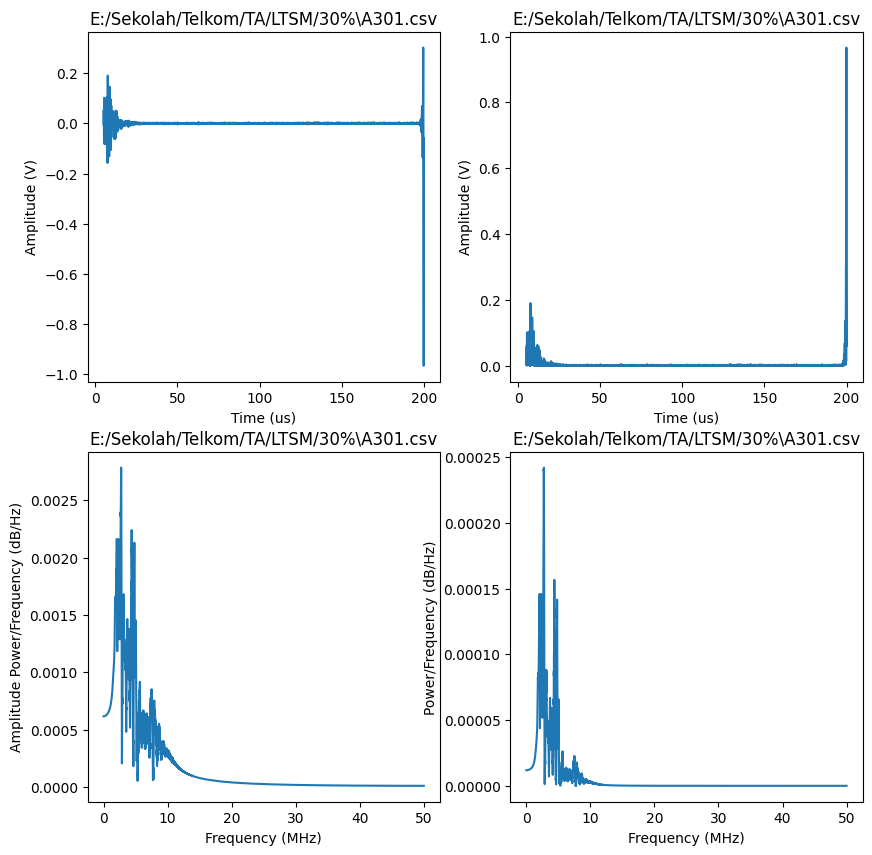

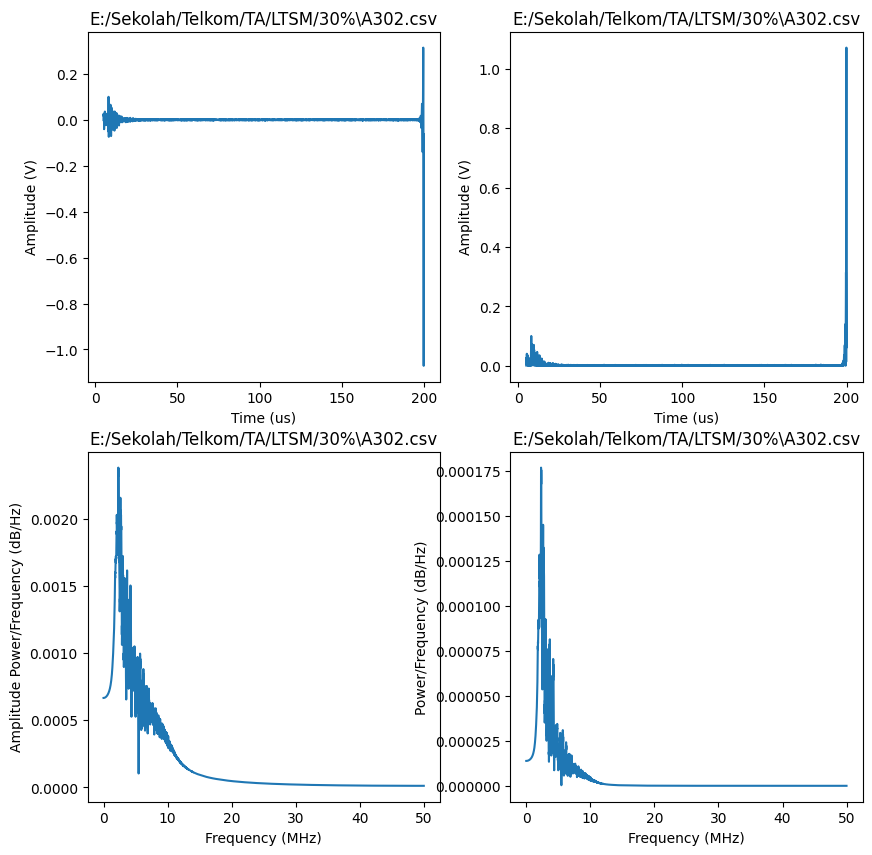

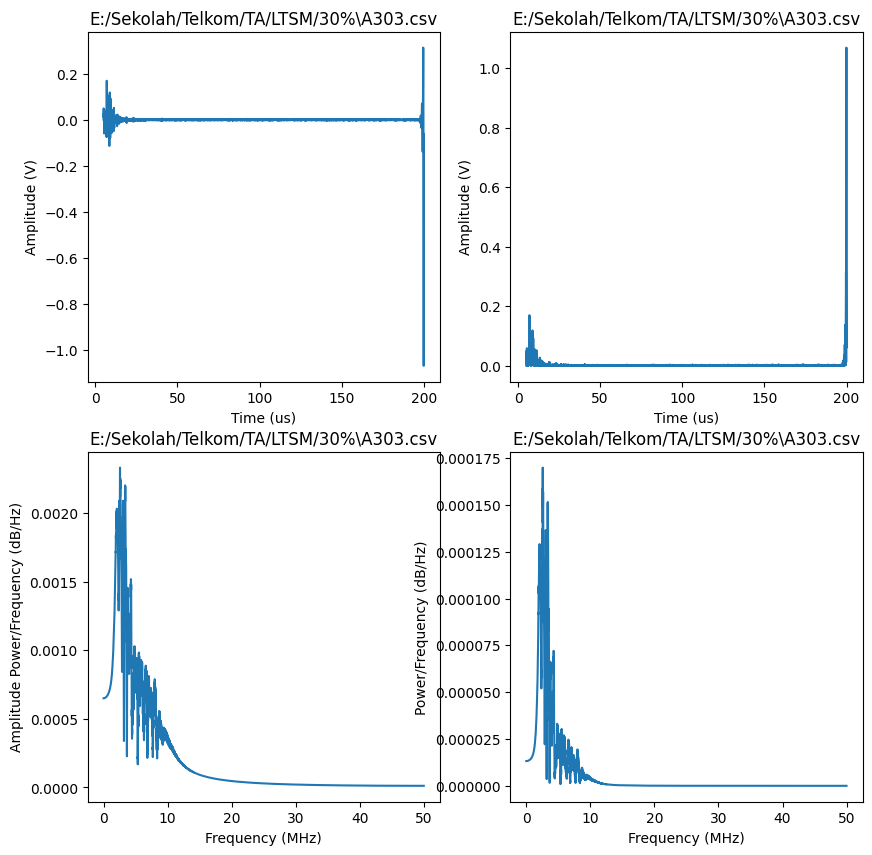

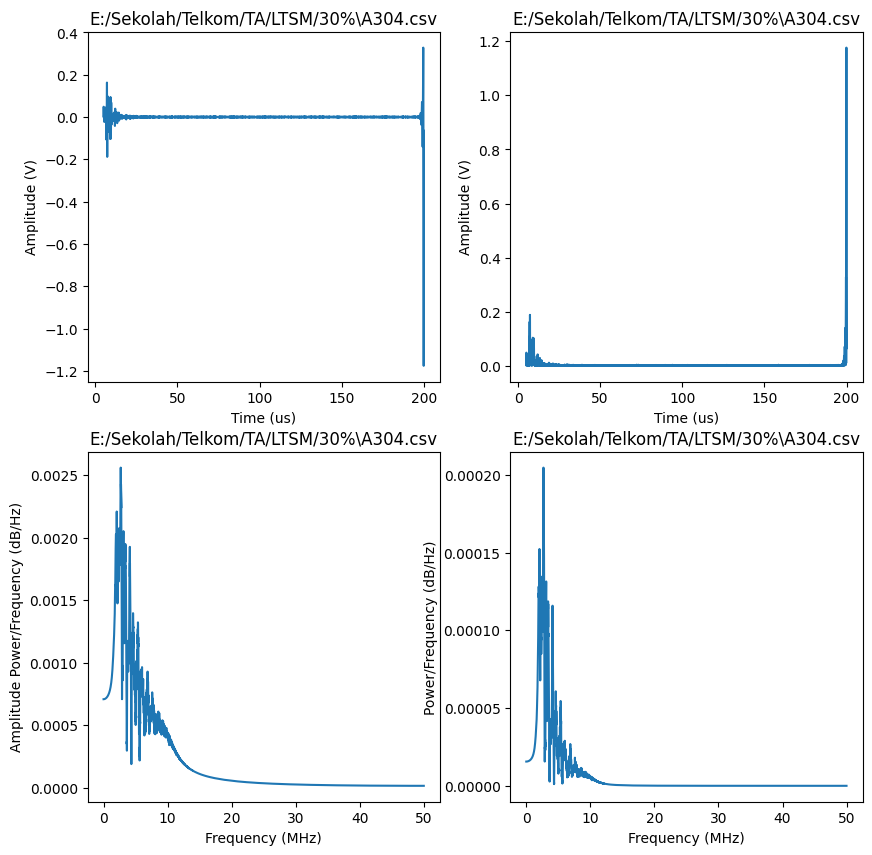

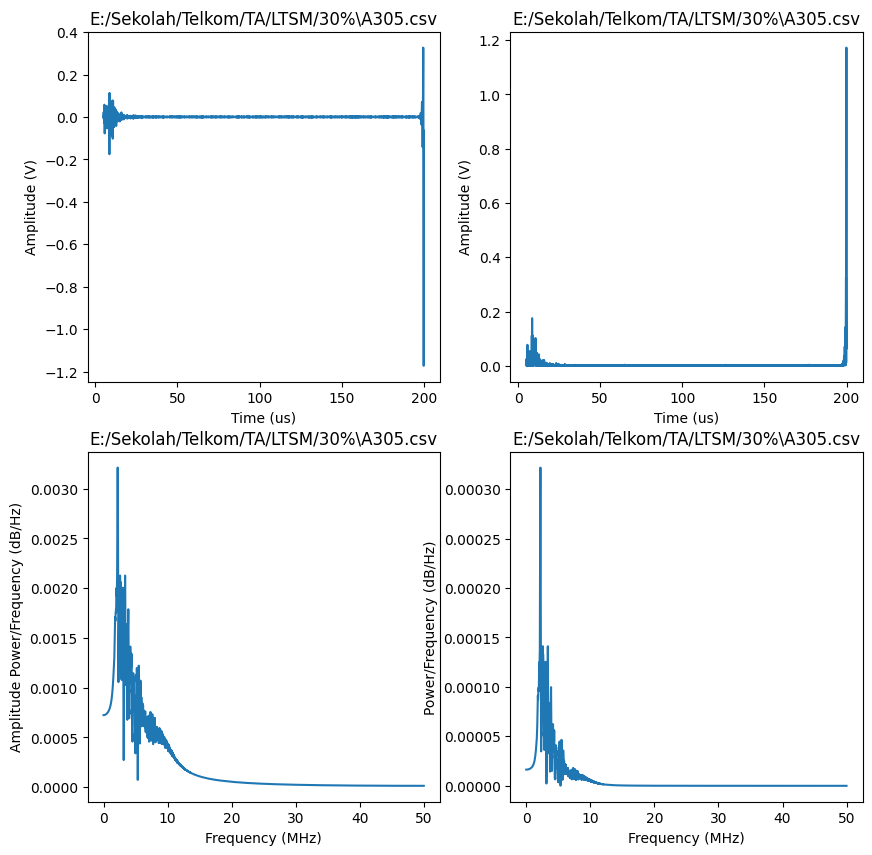

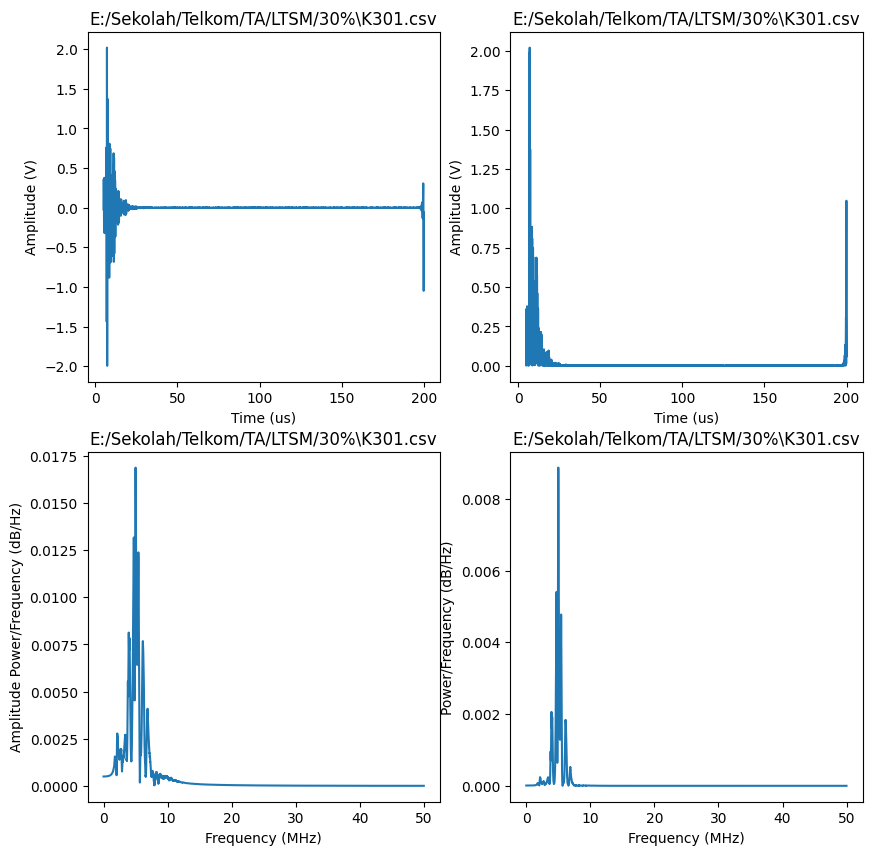

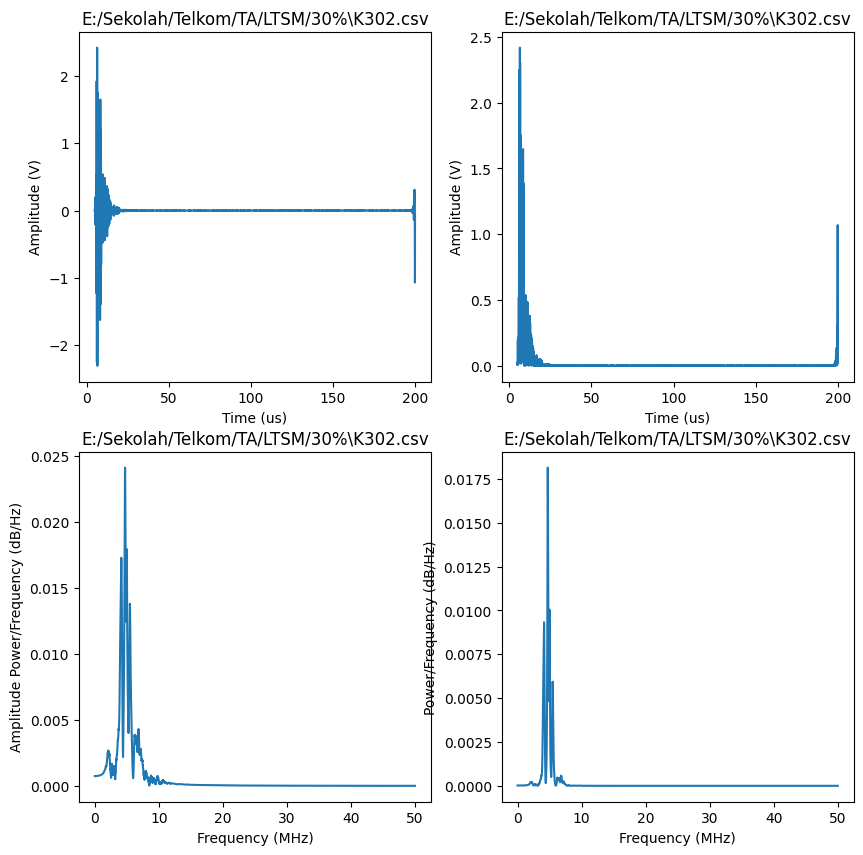

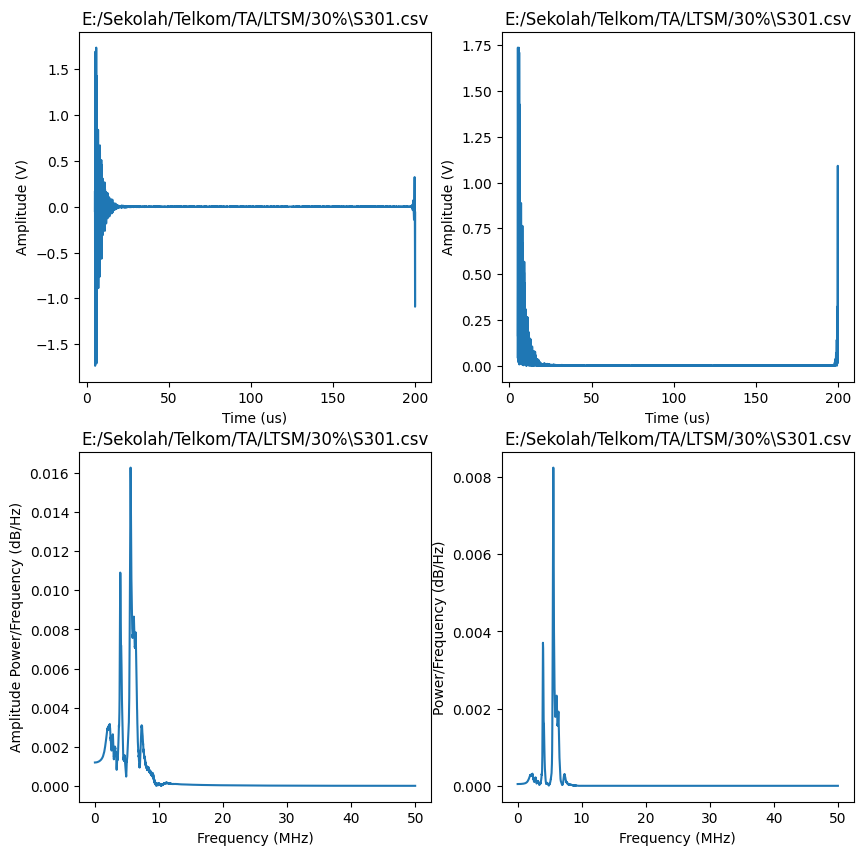

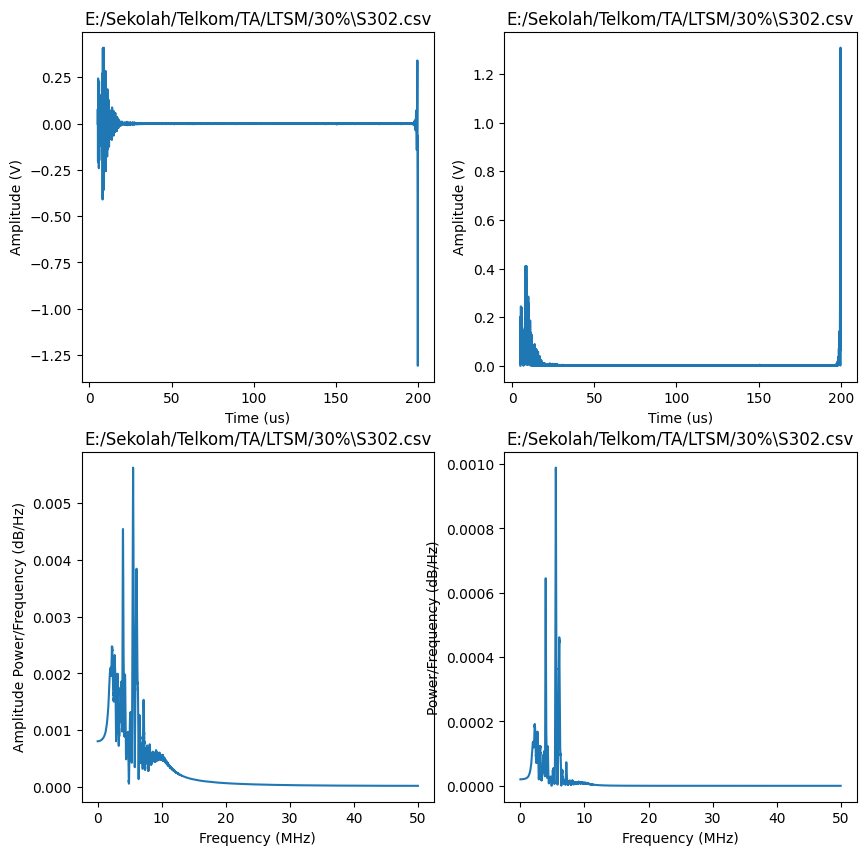

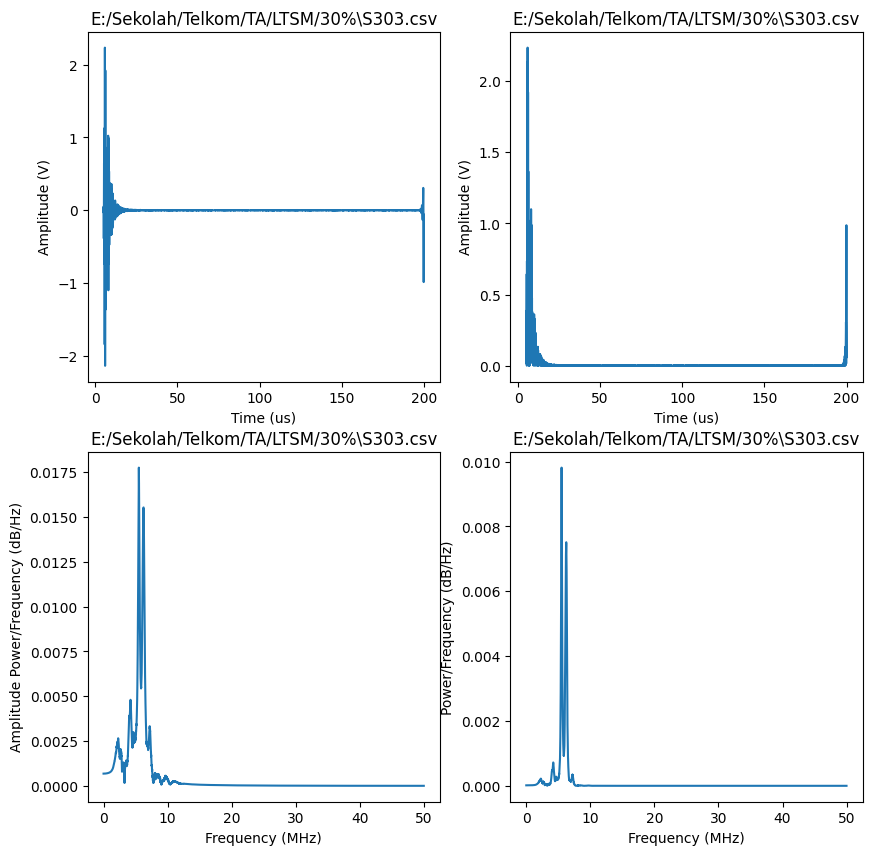

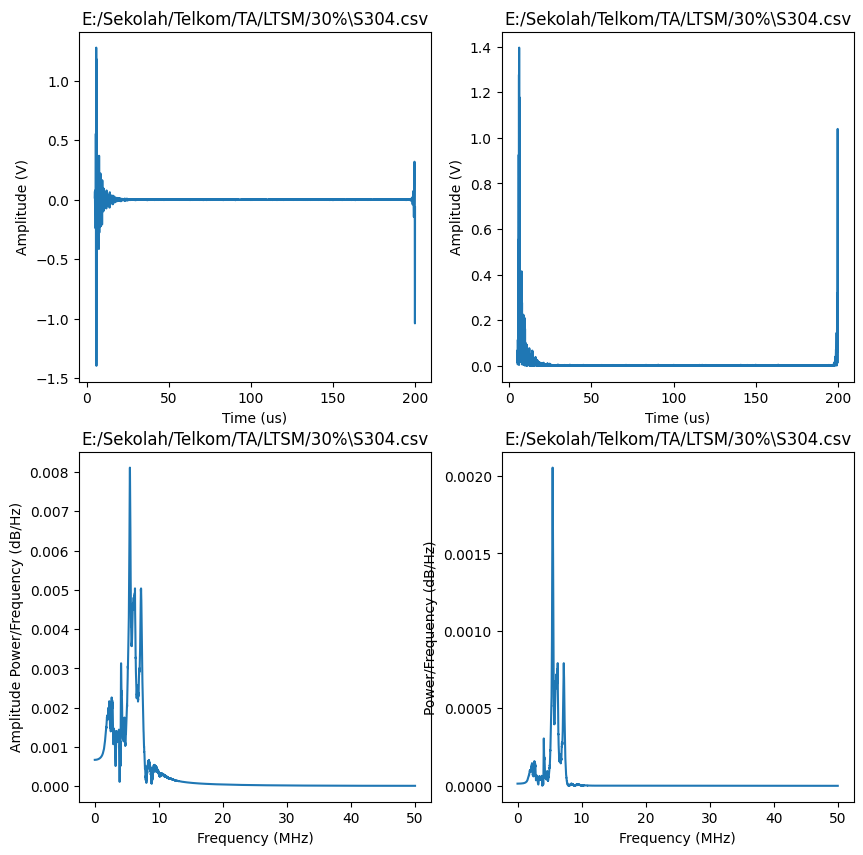

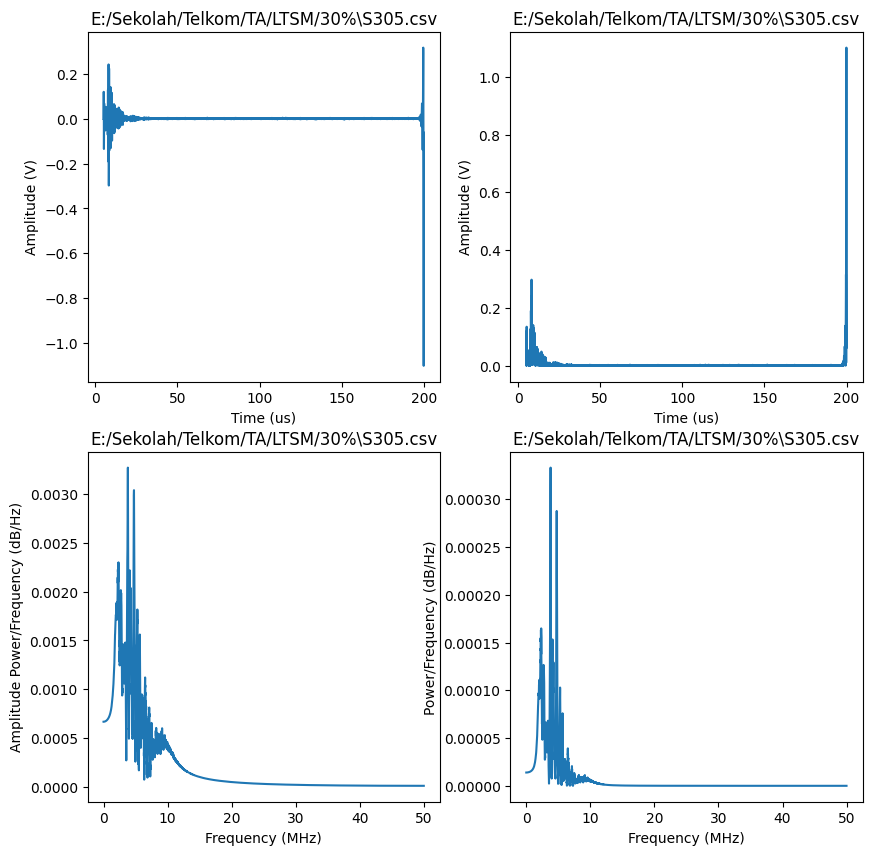

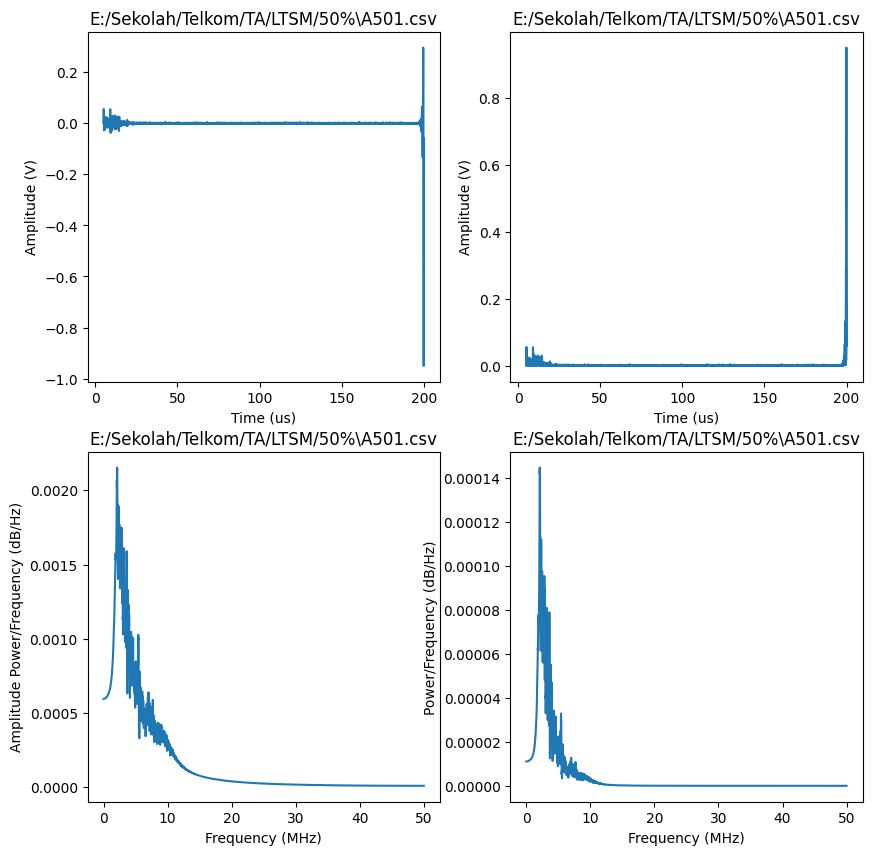

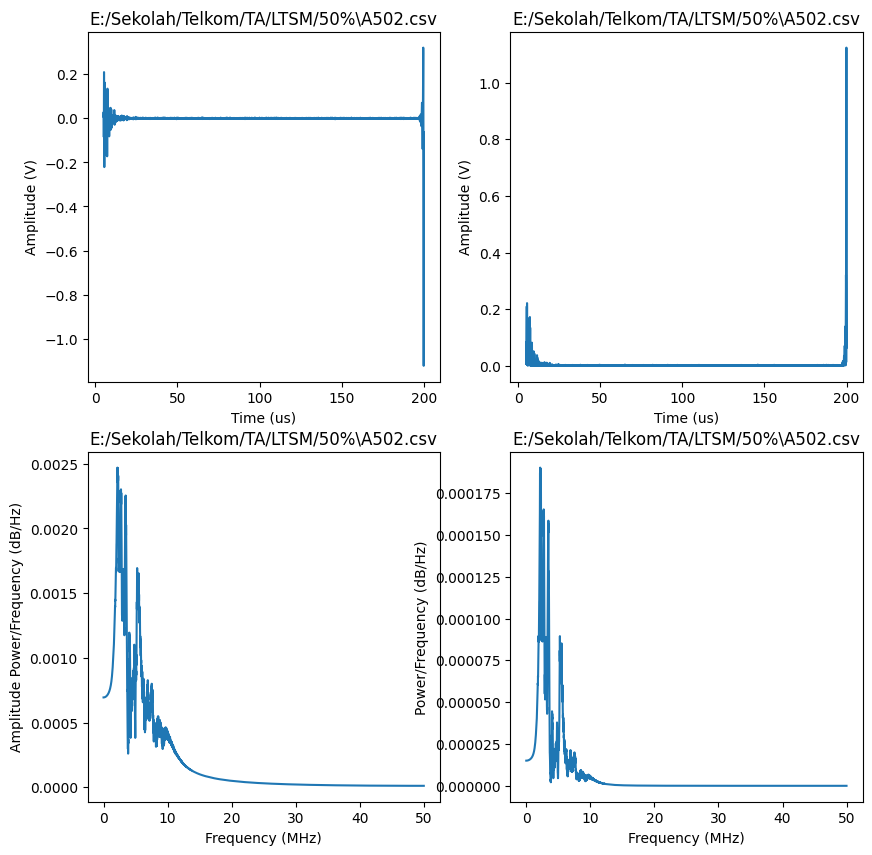

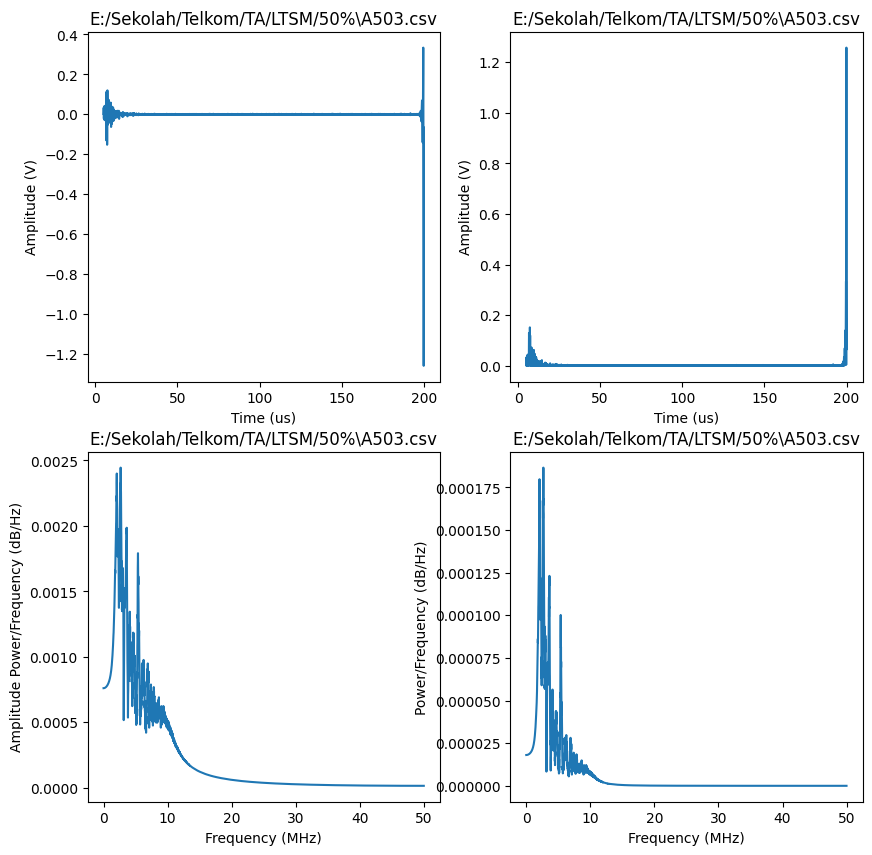

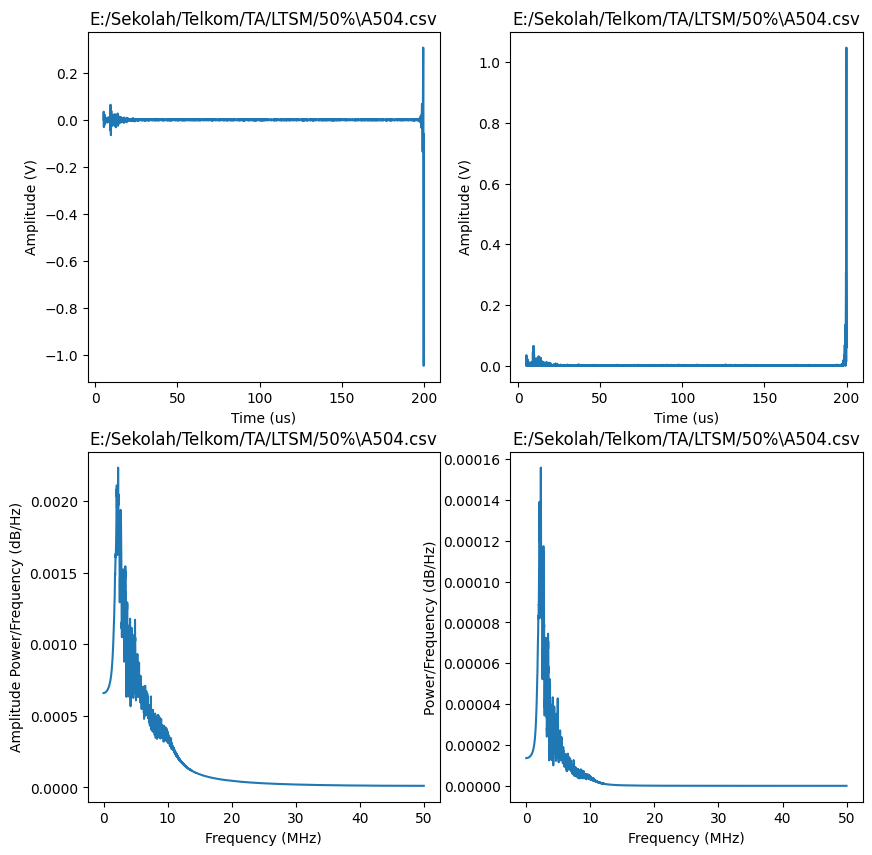

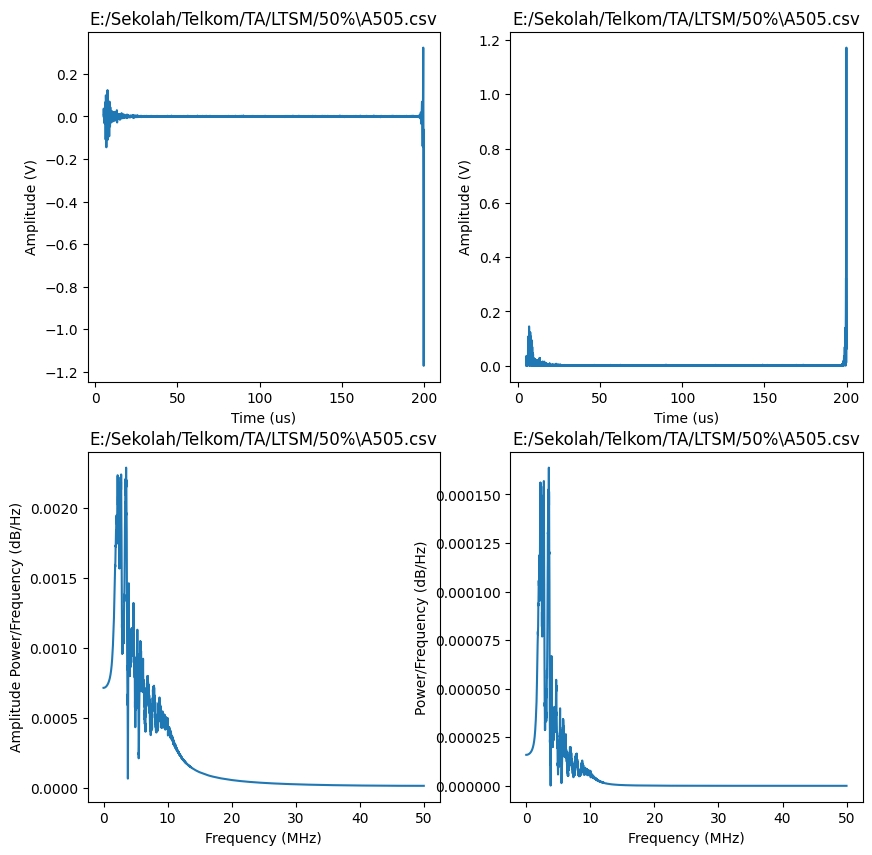

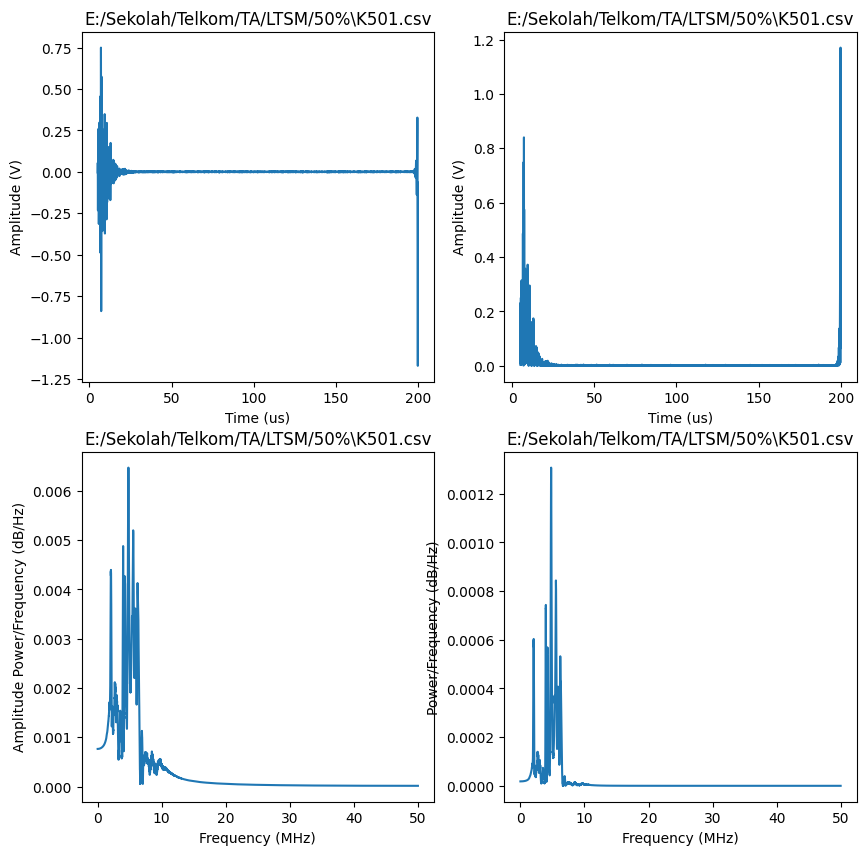

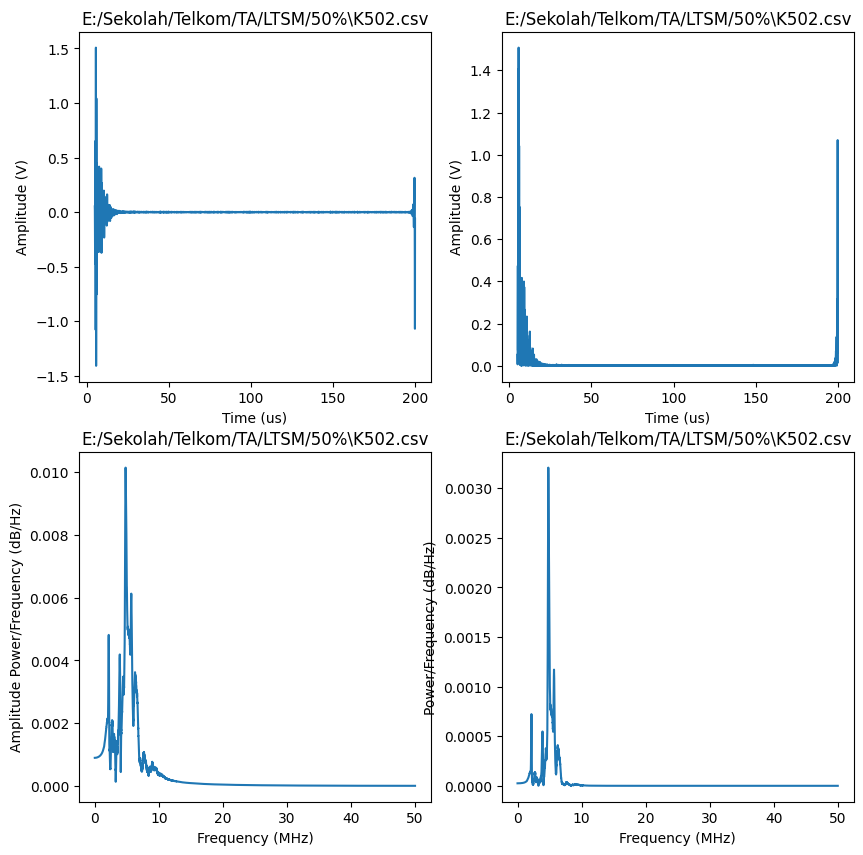

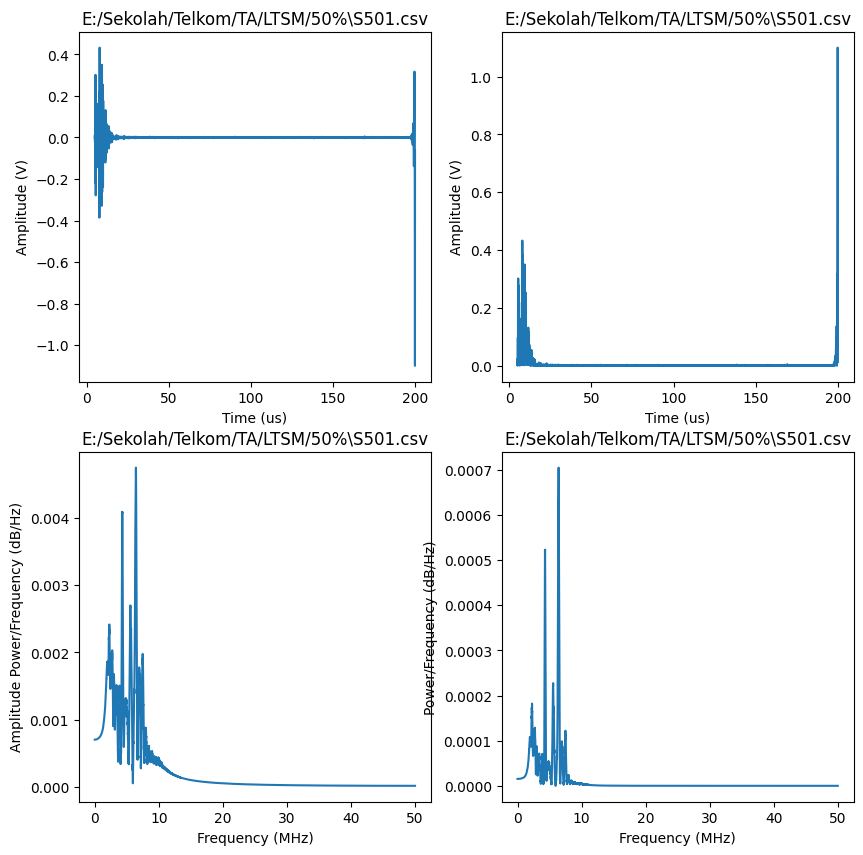

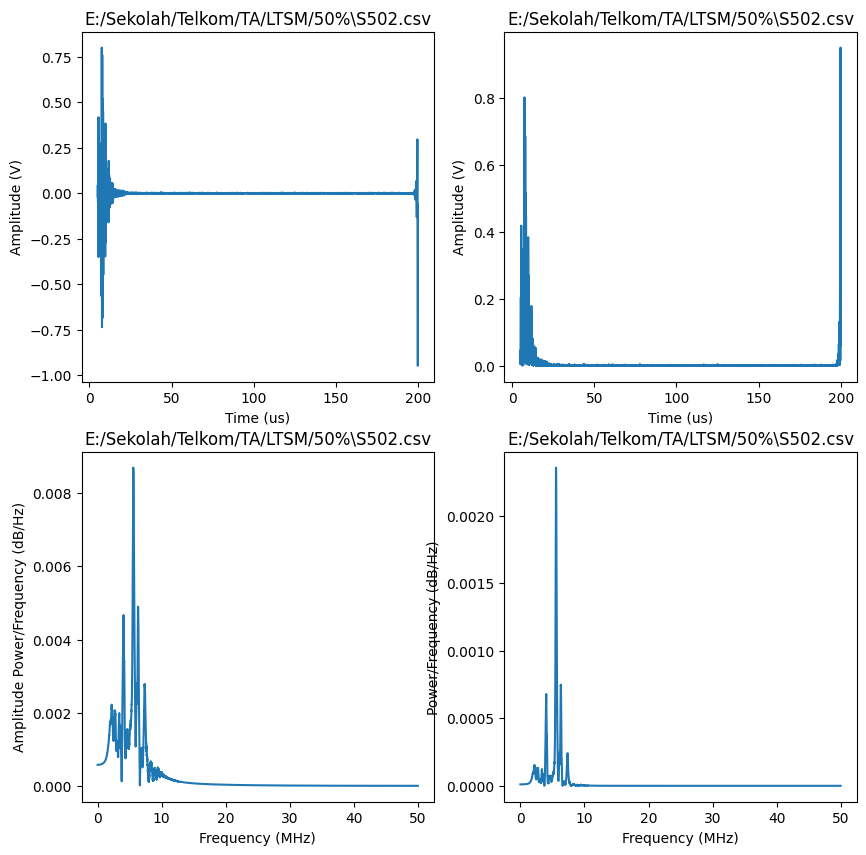

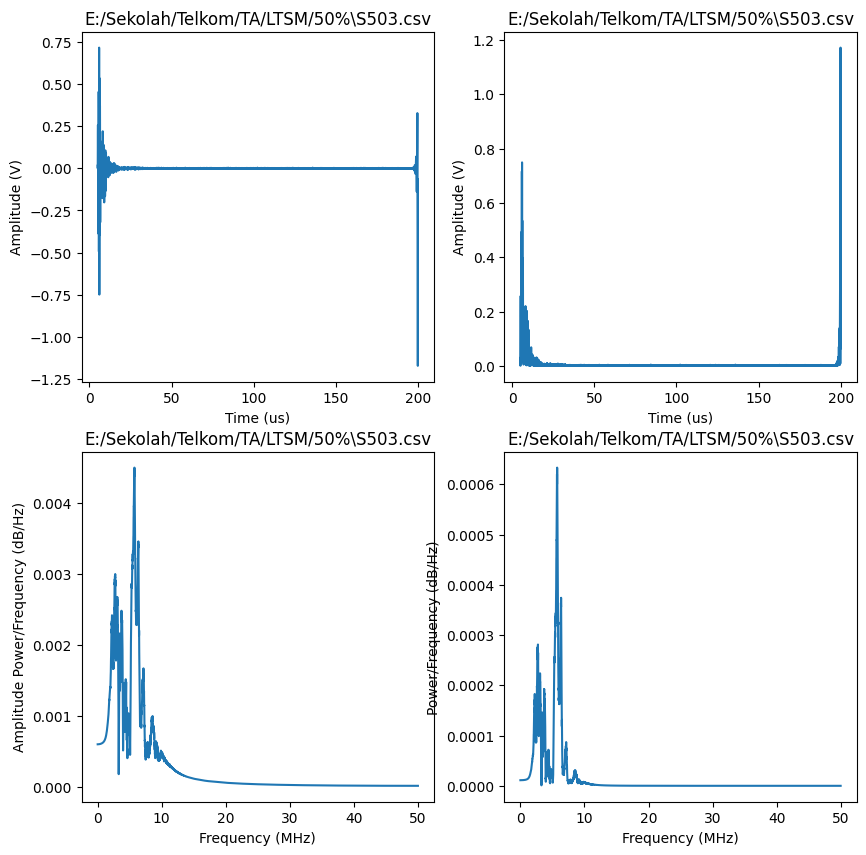

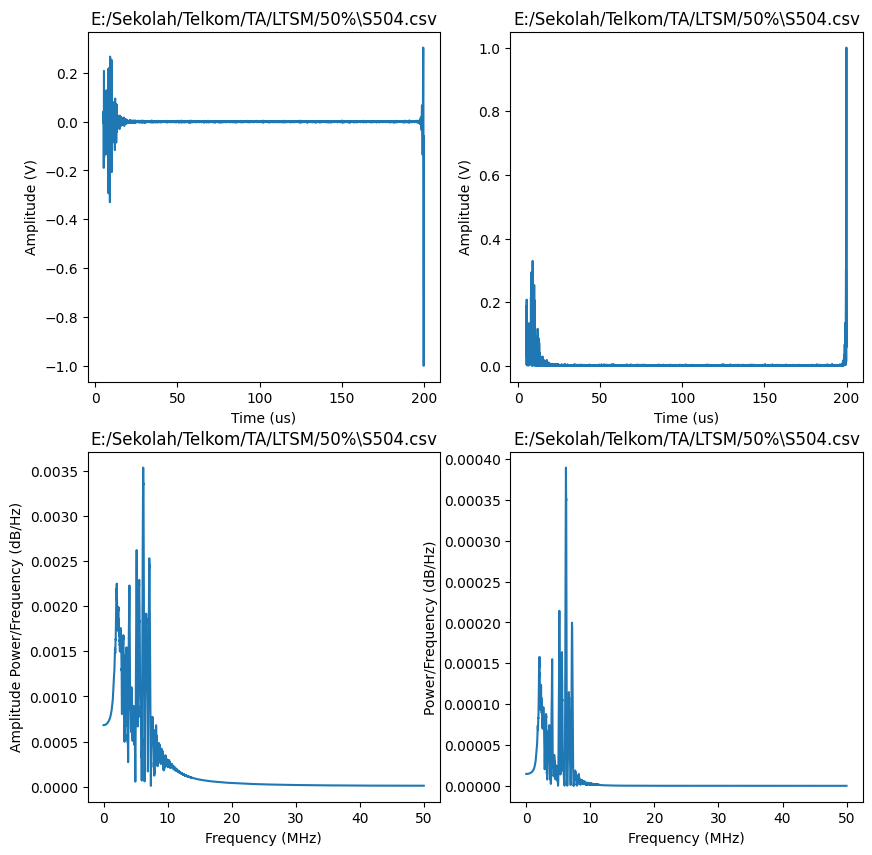

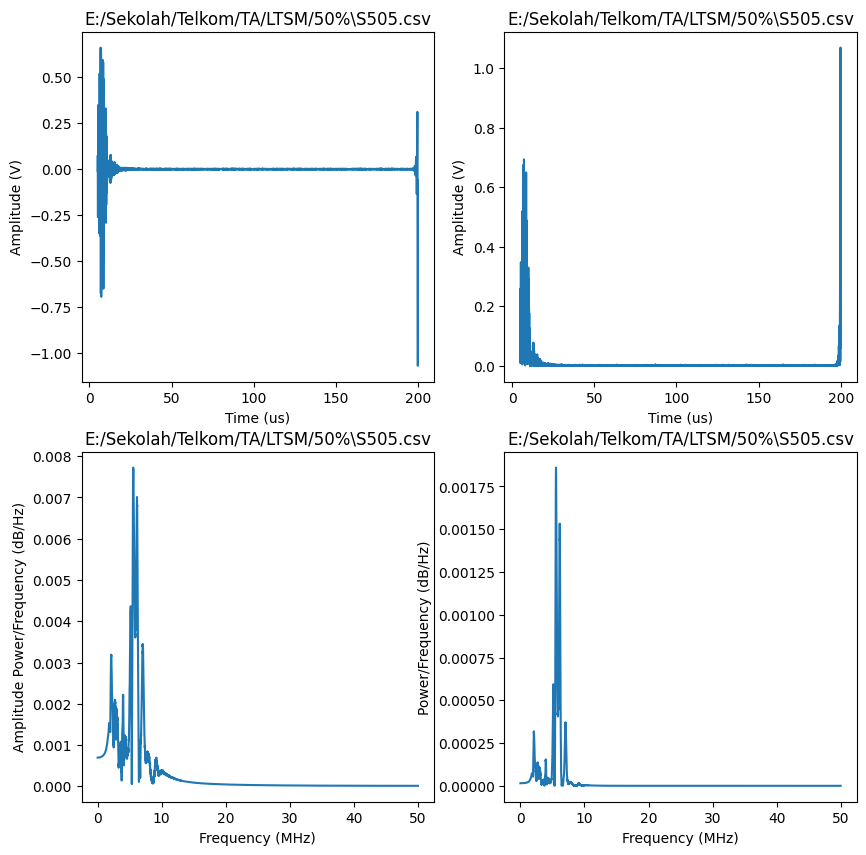

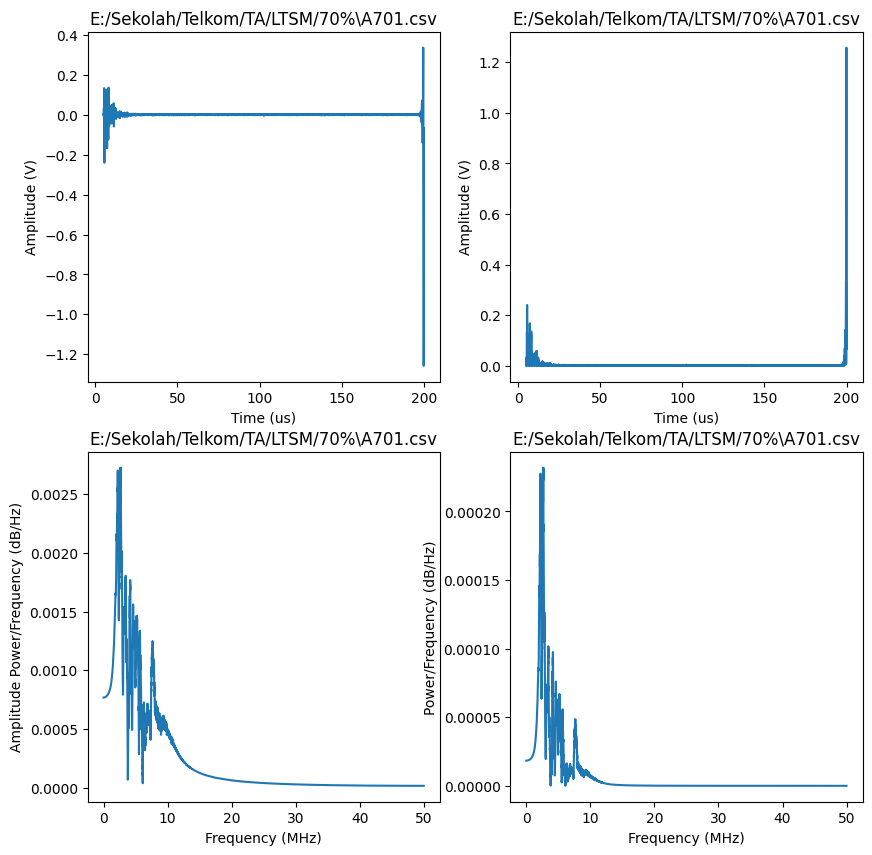

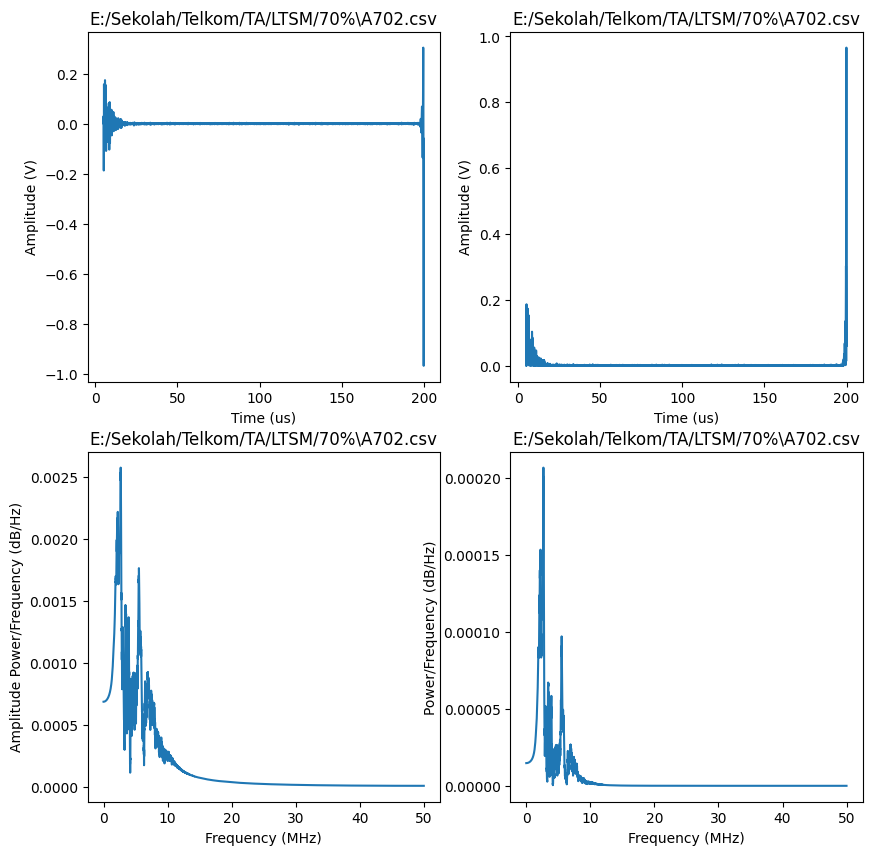

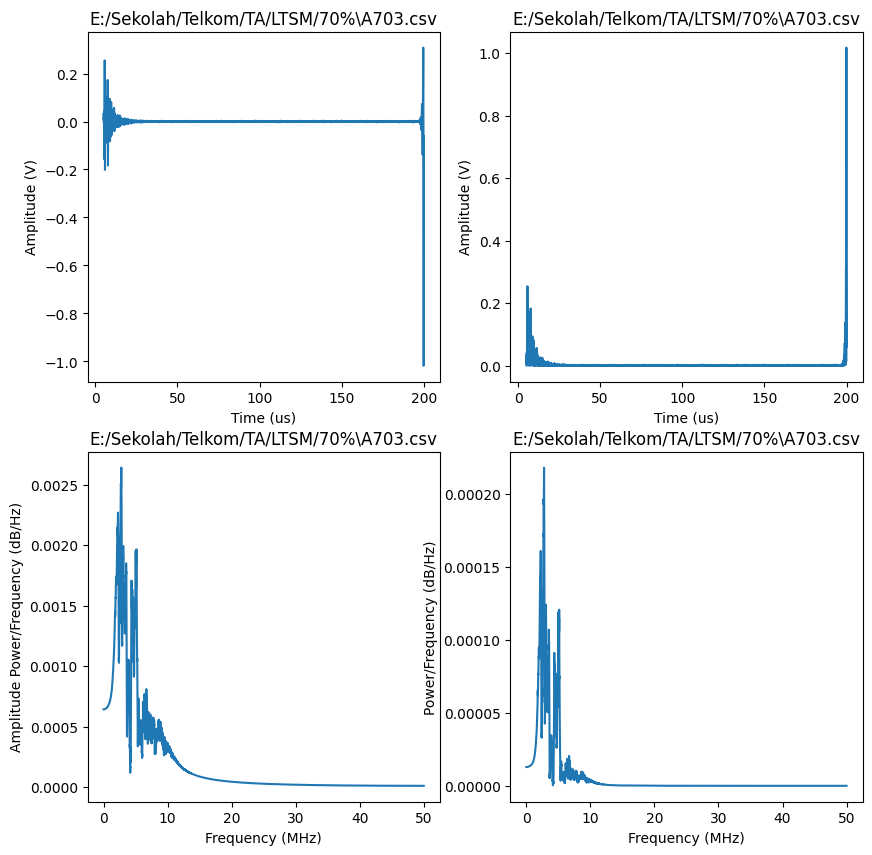

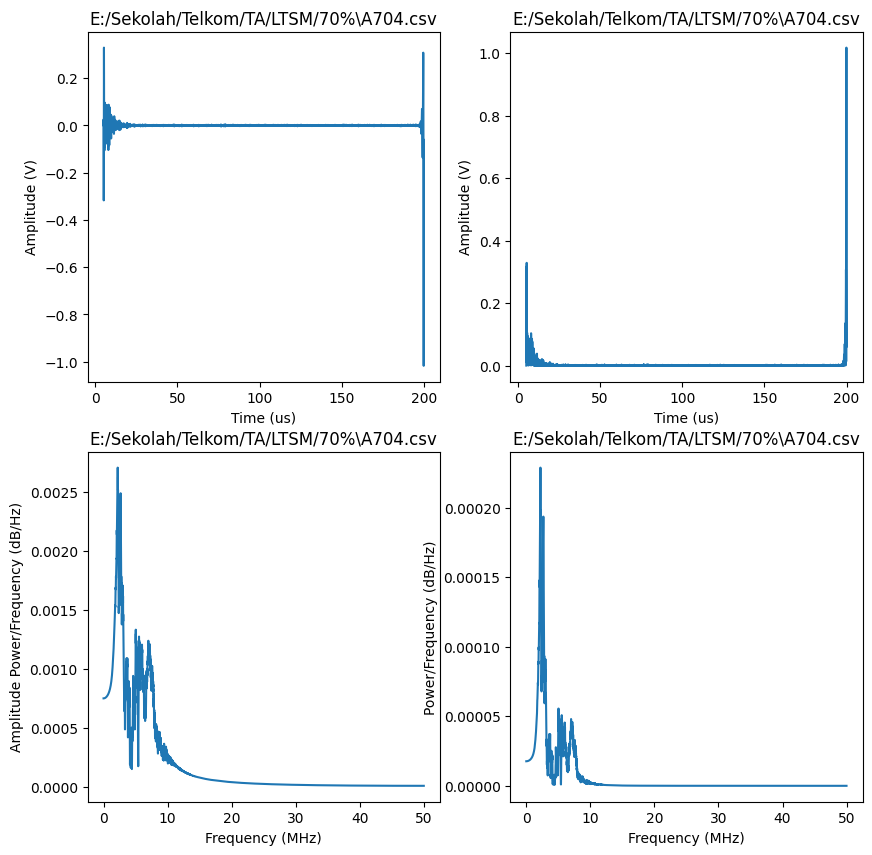

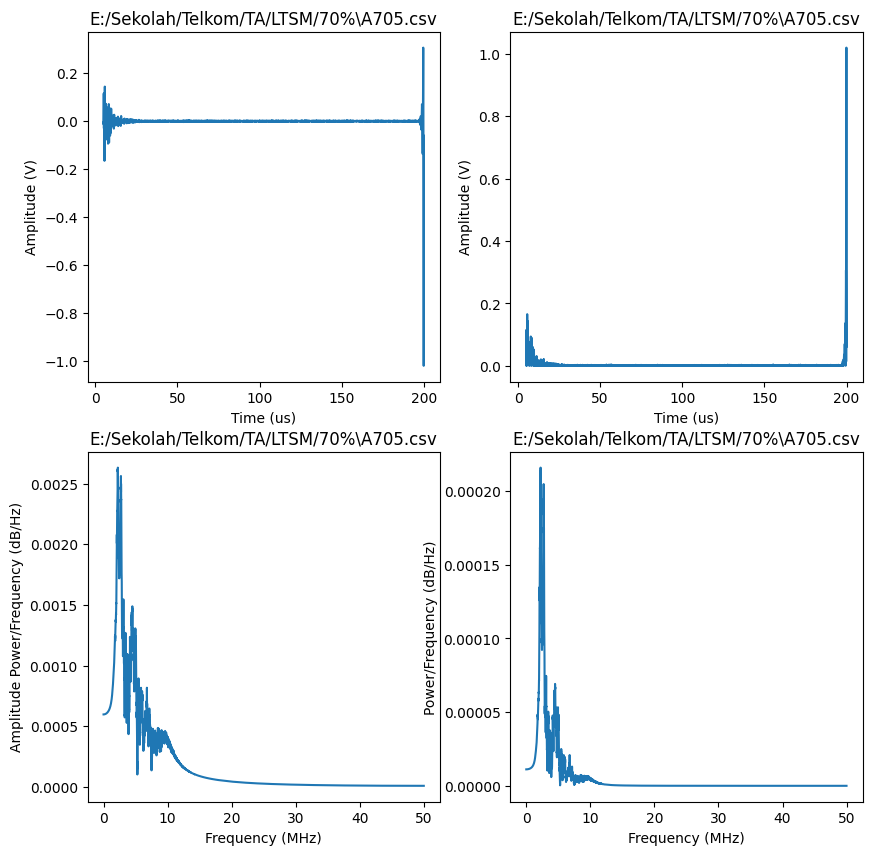

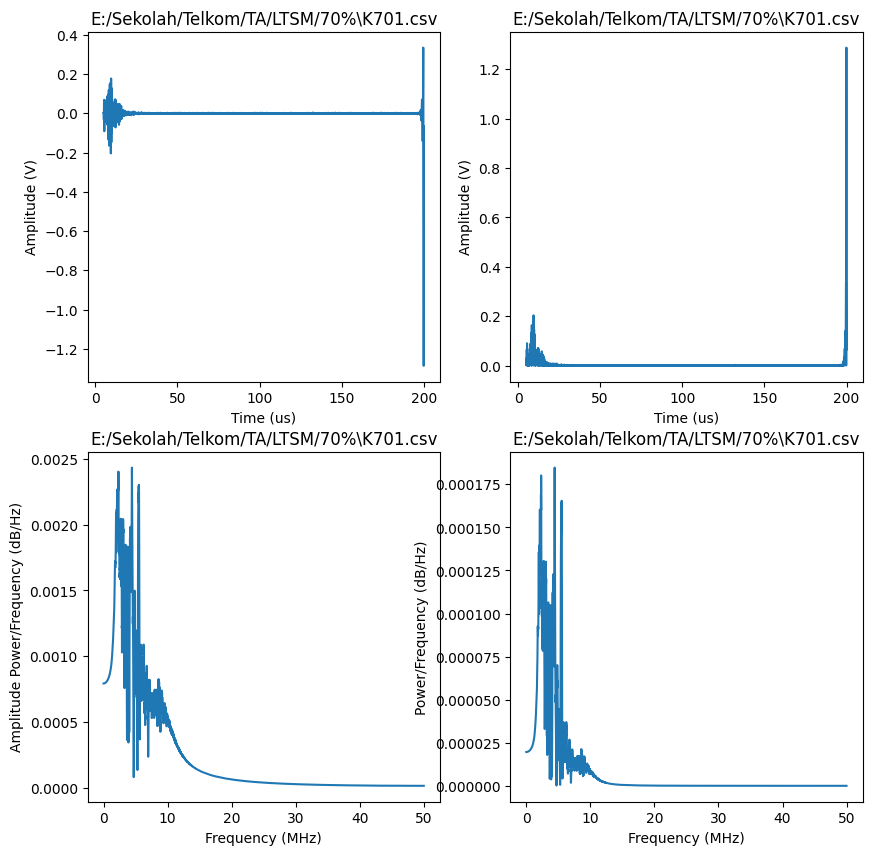

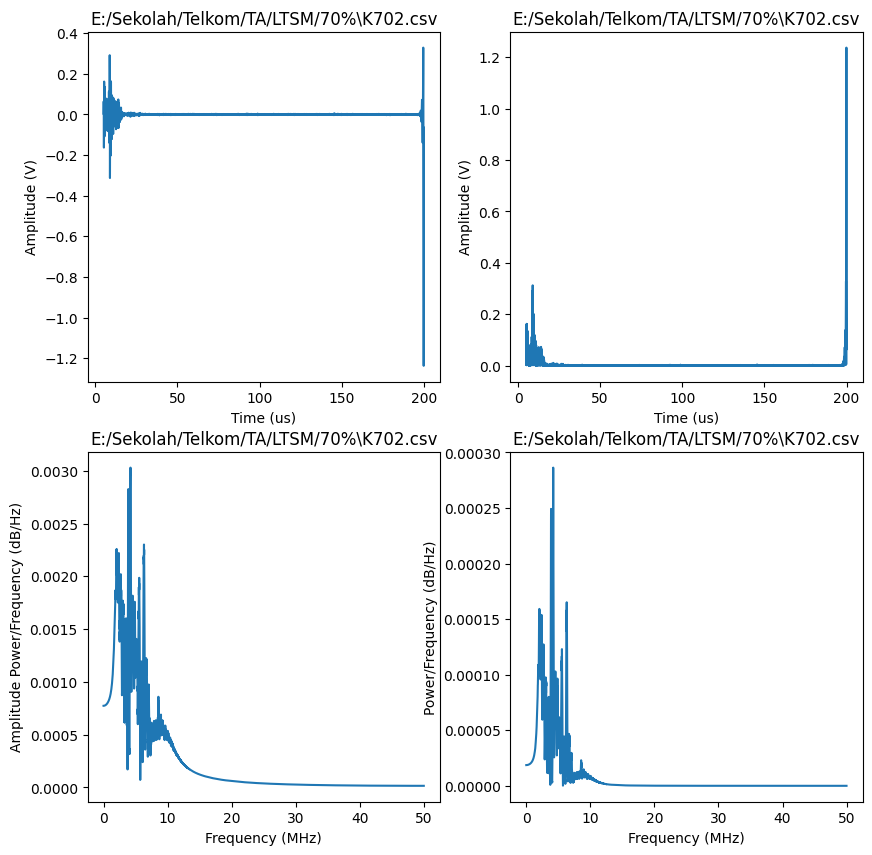

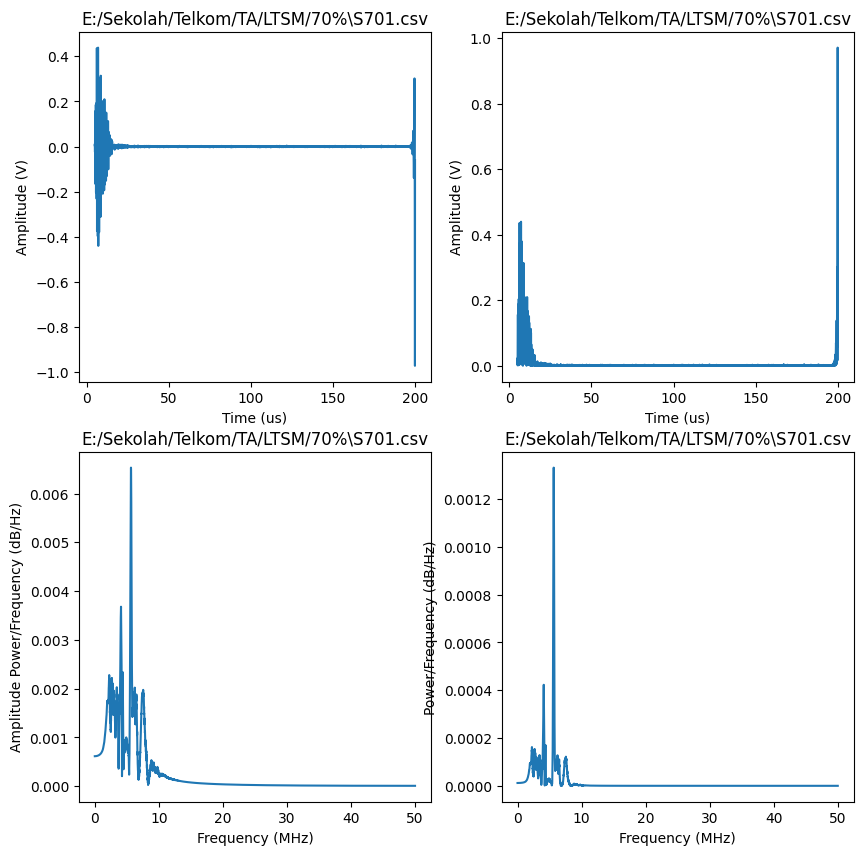

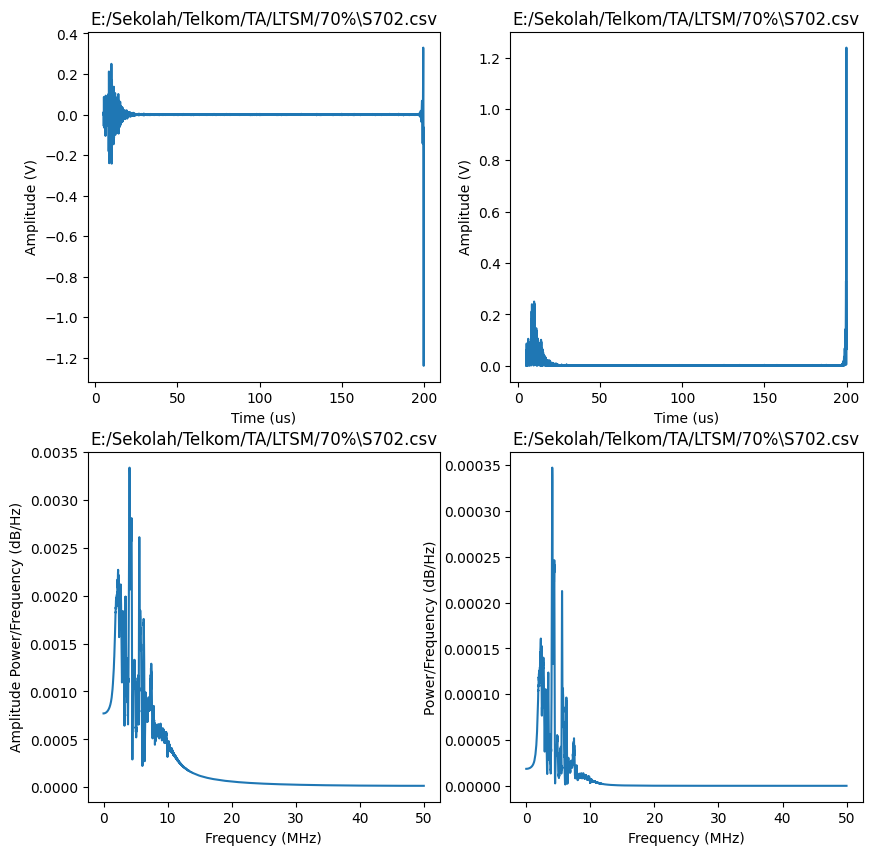

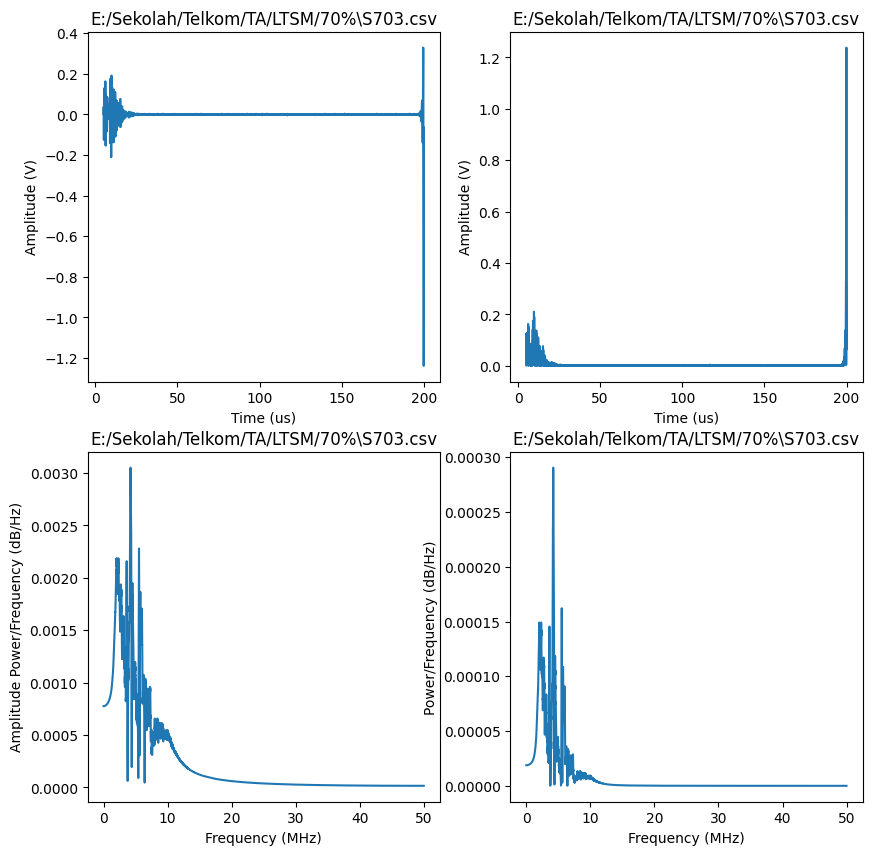

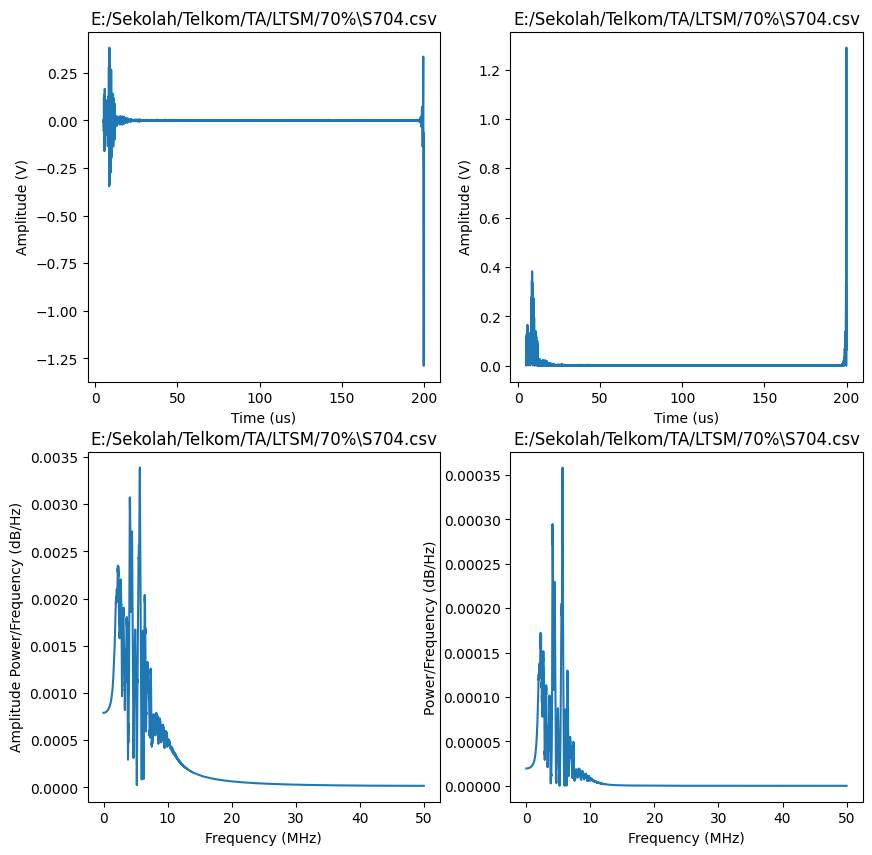

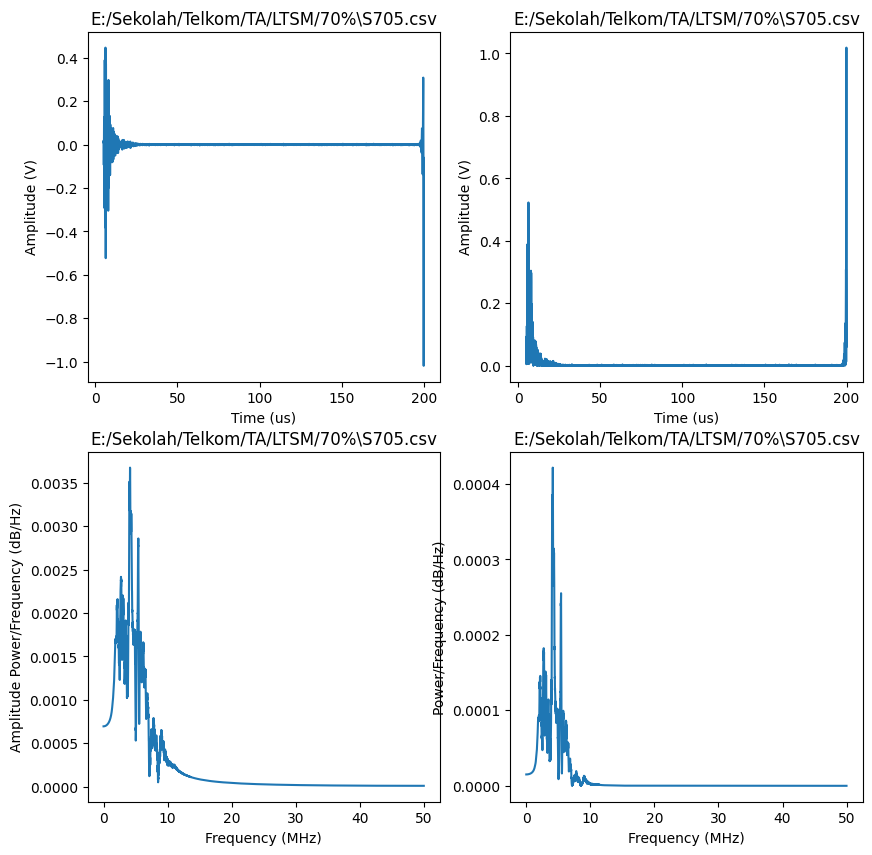

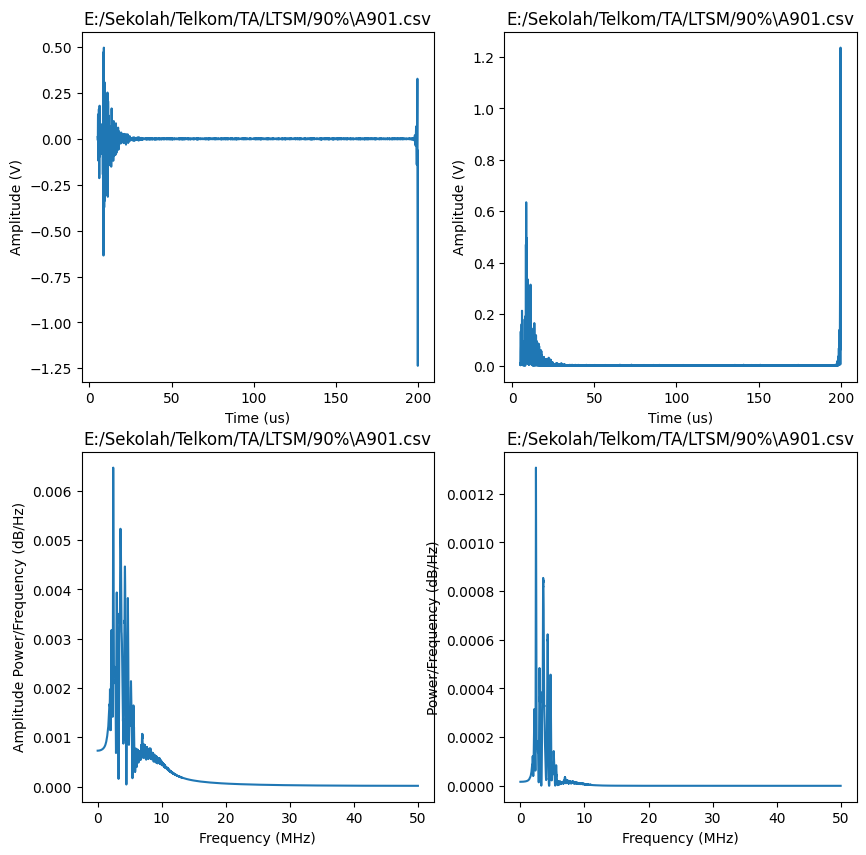

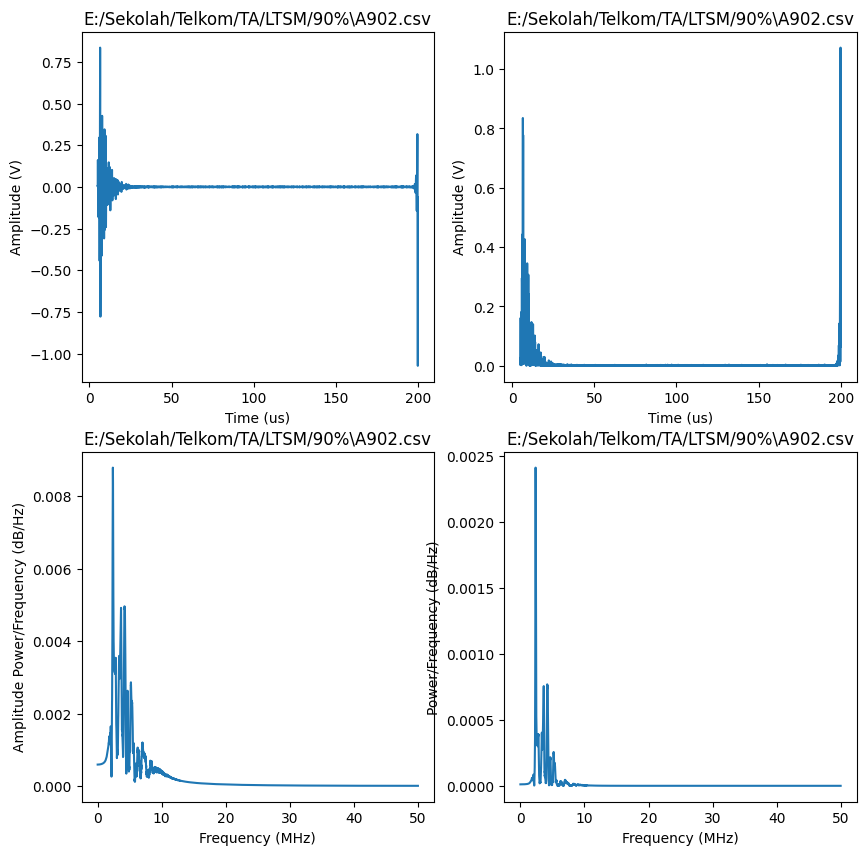

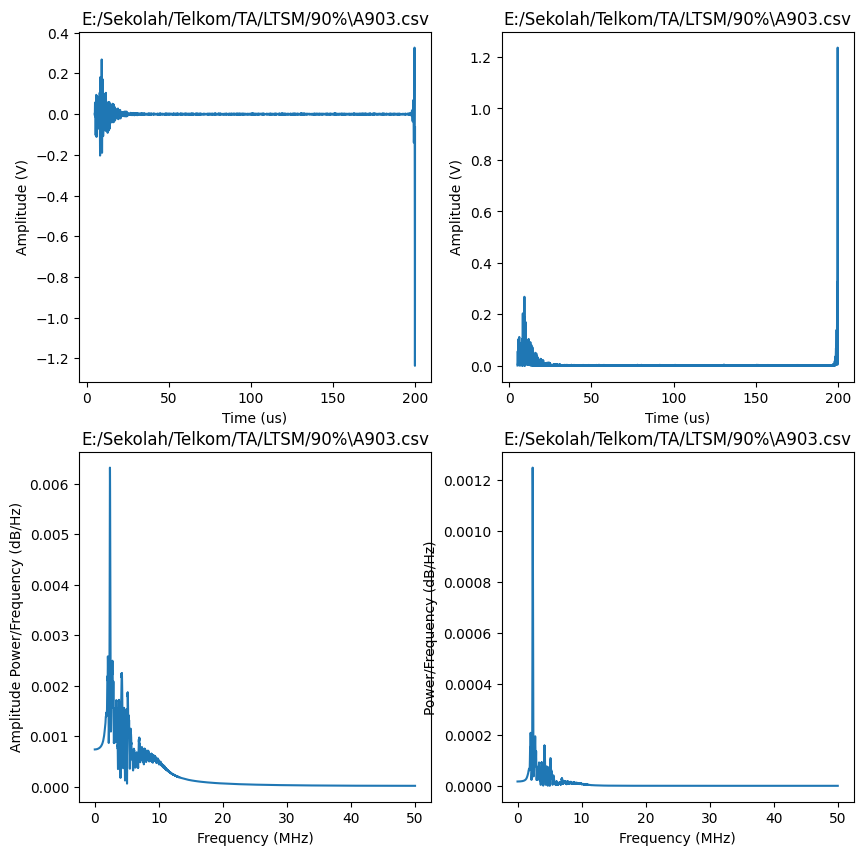

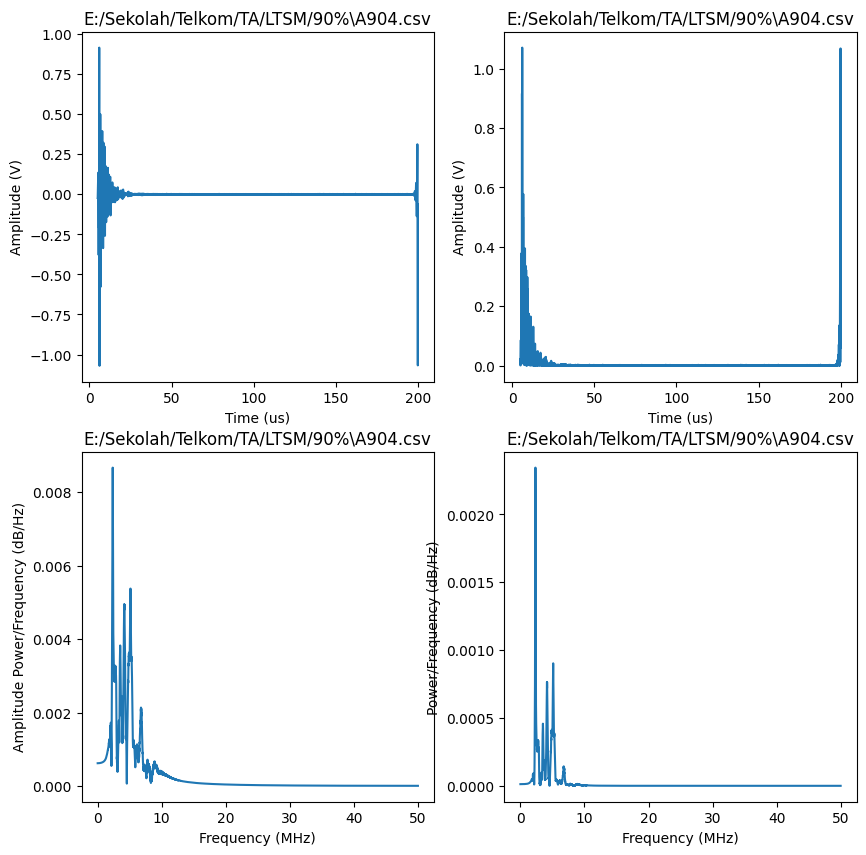

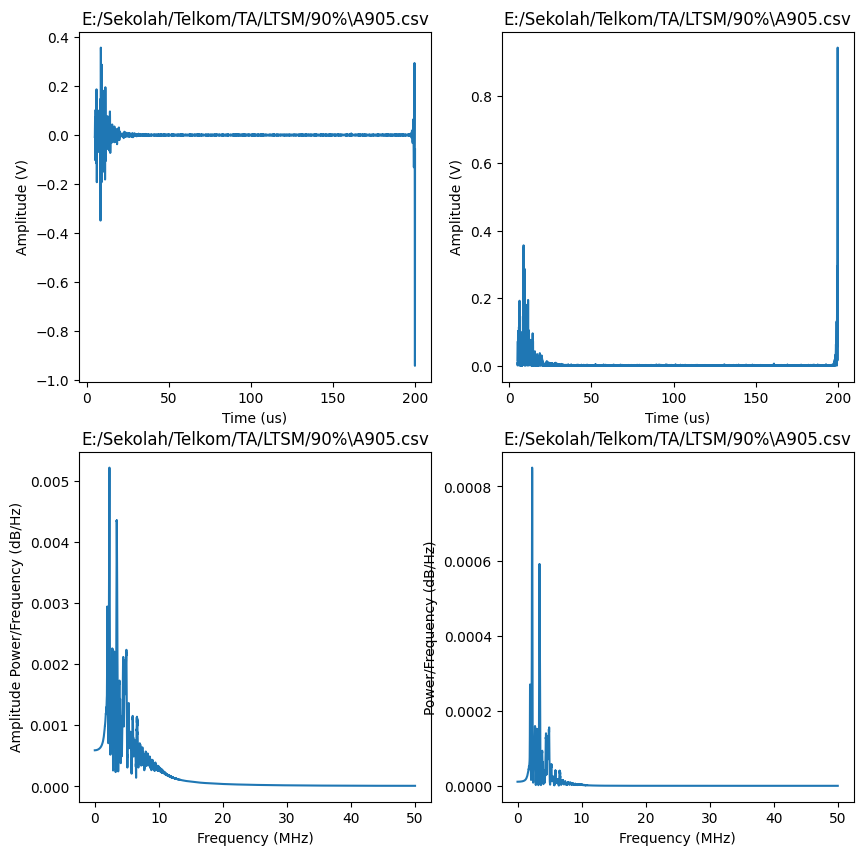

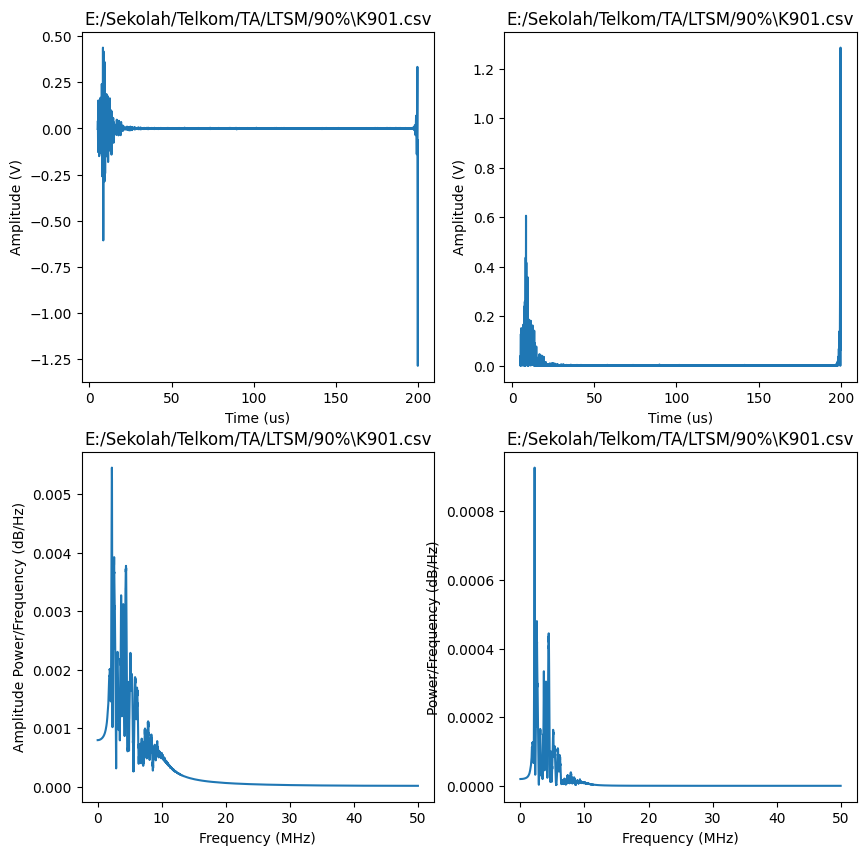

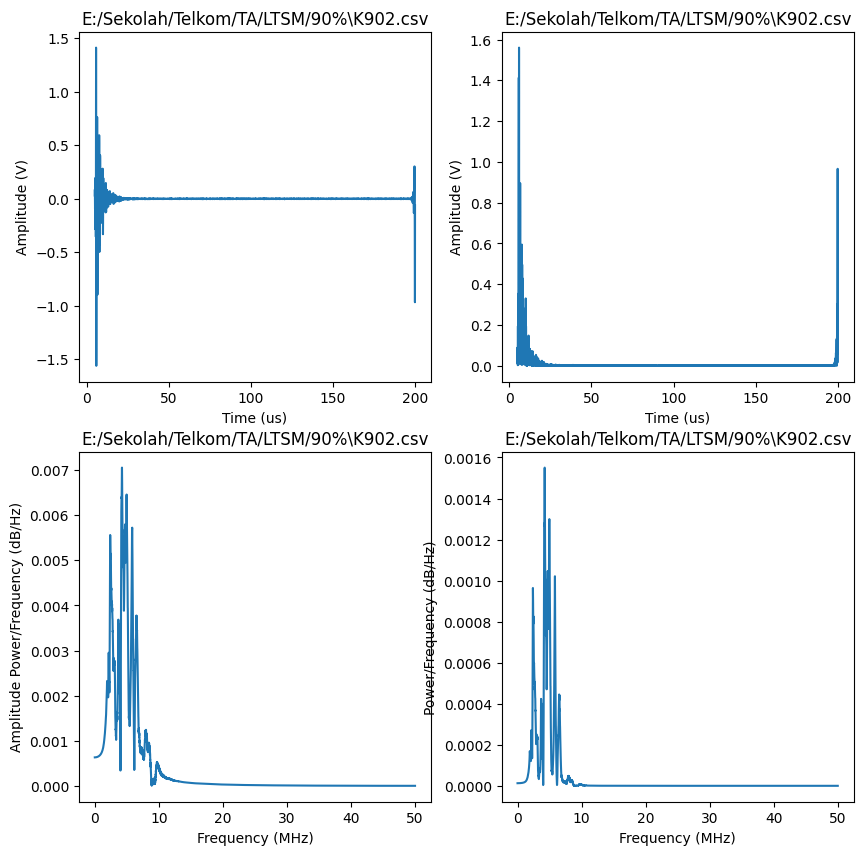

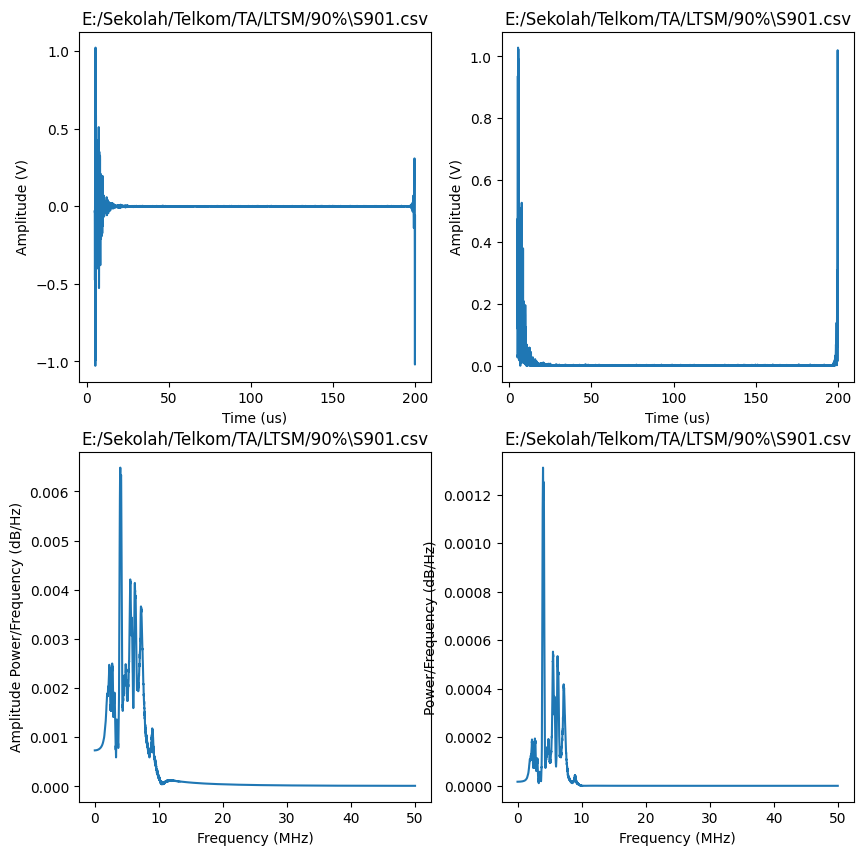

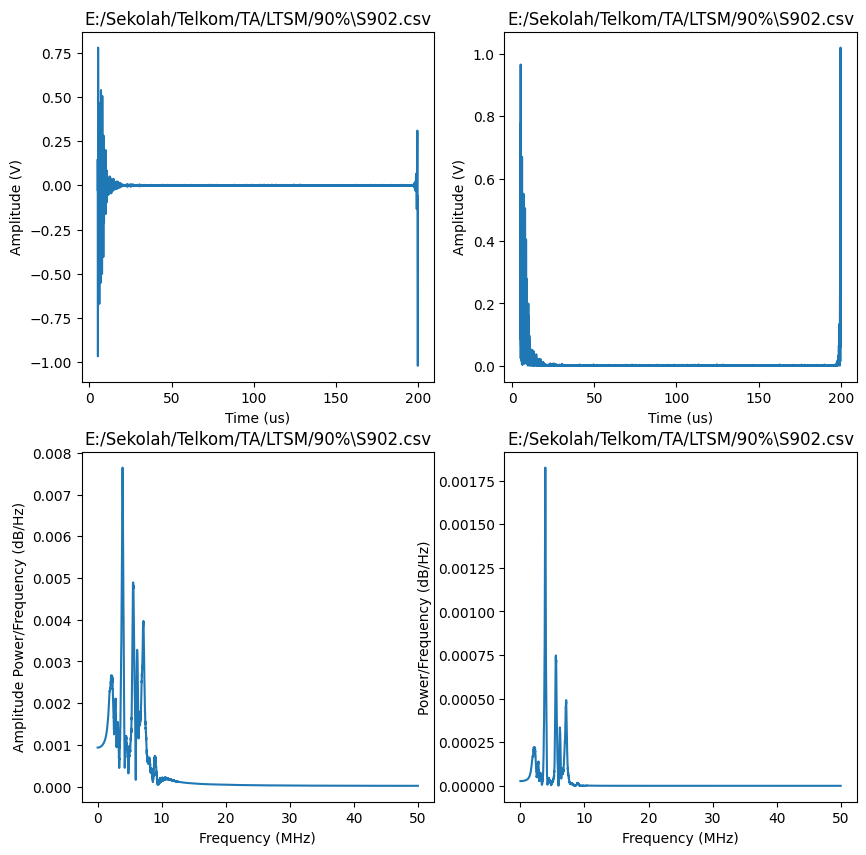

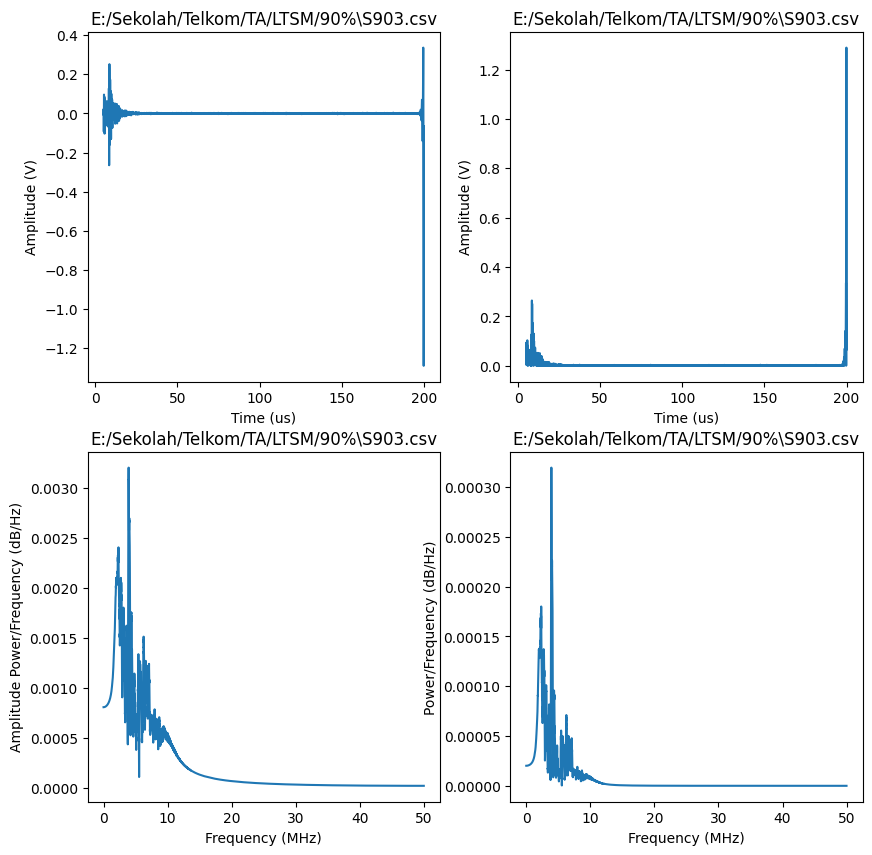

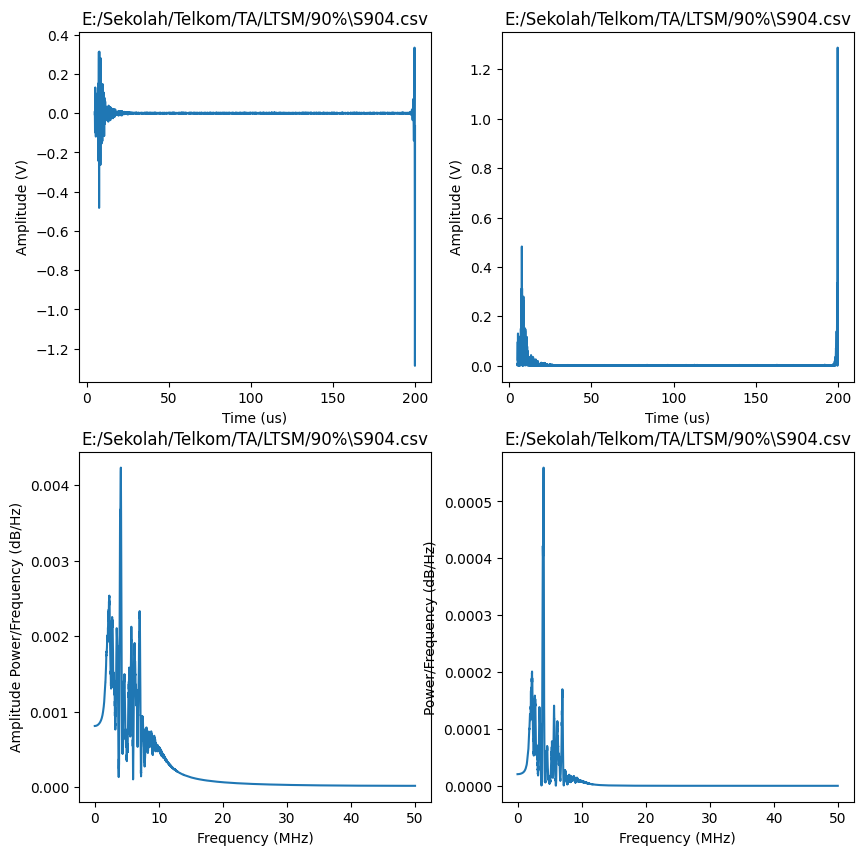

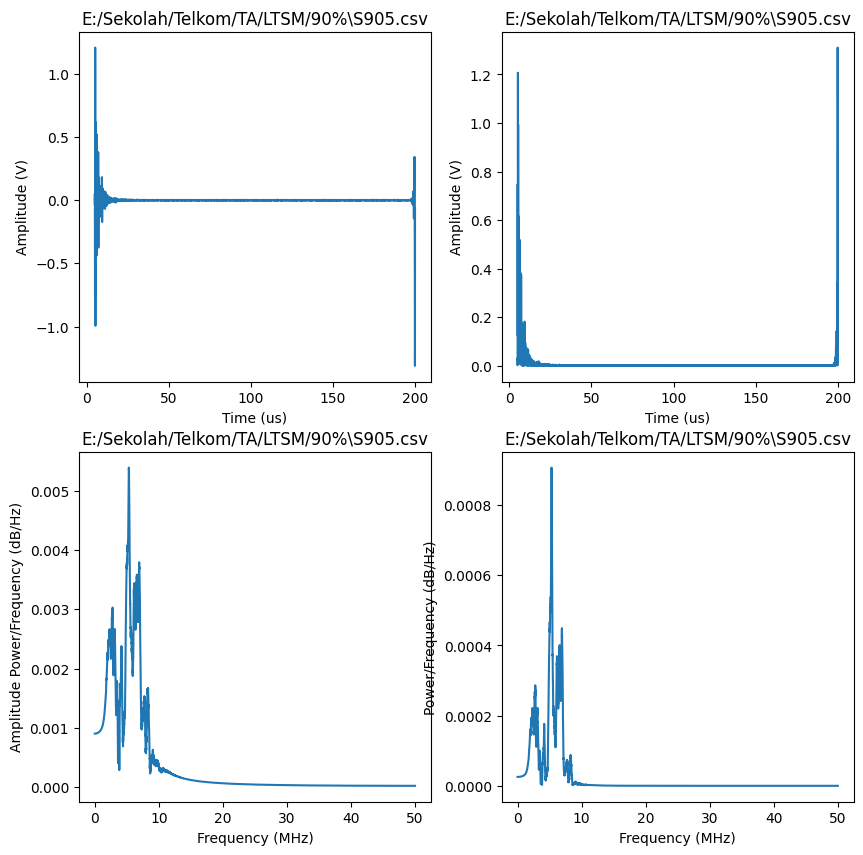

In [5]:
i = 0

for file_csv in files_csv:
   
    df = pd.read_csv(file_csv)
    var = df['X'].values
    data = df['Y'].values
     
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    
    #Filter bandpass
    filtered_signal = signal.filtfilt(b, a, data)
    
    # Rectify signal
    rectified_signal = np.abs(filtered_signal)
    
    # One-sided FFT
    signal_fft = np.fft.fft(filtered_signal)
    signal_freq = np.fft.fftfreq(len(filtered_signal), 1/fs)
    n = len(filtered_signal)
    freq = signal_freq[0:int(n/2)]
    fft_amp = np.abs(signal_fft)[0:int(n/2)]/n*2
    
    # One-sided PSD
    psd = (1/(fs*n)) * np.square(np.abs(signal_fft[:n//2]))
    freq_psd = signal_freq[0:int(n/2)]
    psd_one_side = psd[0:int(n/2)]
    
    # processed_csv_file = file_csv.replace(".csv", "_processed.csv")
    # df.to_csv(processed_csv_file, index=False)
    
    # fig, axs = plt.subplots(2, 2, figsize=(10,10))

    # axs[0, 0].plot(var, filtered_signal)
    # axs[0, 0].set_title(file_csv)
    # axs[0, 0].set_xlabel('Time (us)')
    # axs[0, 0].set_ylabel('Amplitude (V)')

    # axs[0, 1].plot(var, rectified_signal)
    # axs[0, 1].set_title(file_csv)
    # axs[0, 1].set_xlabel('Time (us)')
    # axs[0, 1].set_ylabel('Amplitude (V)')

    # axs[1, 0].plot(freq, fft_amp)
    # axs[1, 0].set_title(file_csv)
    # axs[1, 0].set_xlabel('Frequency (MHz)')
    # axs[1, 0].set_ylabel('Amplitude Power/Frequency (dB/Hz)')

    # axs[1, 1].plot(freq_psd, psd_one_side)
    # axs[1, 1].set_title(file_csv)
    # axs[1, 1].set_xlabel('Frequency (MHz)')
    # axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

    # save_img = file_csv+".png"
    # plt.savefig(save_img)
    
    
    

In [6]:
# os.chdir(load)
# if not os.path.exists(load+"Process"):
#         os.makedirs(load+"Process")
#         print("'data' folder created")
        
# for root, dirs, files in os.walk(load):
#         for filename in files:
#             if filename.endswith("_processed.csv"):
#                 original_file = os.path.join(root, filename)                
#                 if not "Process/" in original_file:
#                     print("Moved '",original_file," to ","./Process/"+filename)
#                     os.rename(original_file, "./Process/"+filename)

Moved ' E:/Sekolah/Telkom/TA/LTSM/30%\A301_processed.csv  to  ./Process/A301_processed.csv
Moved ' E:/Sekolah/Telkom/TA/LTSM/30%\A302_processed.csv  to  ./Process/A302_processed.csv
Moved ' E:/Sekolah/Telkom/TA/LTSM/30%\A303_processed.csv  to  ./Process/A303_processed.csv
Moved ' E:/Sekolah/Telkom/TA/LTSM/30%\A304_processed.csv  to  ./Process/A304_processed.csv
Moved ' E:/Sekolah/Telkom/TA/LTSM/30%\A305_processed.csv  to  ./Process/A305_processed.csv
Moved ' E:/Sekolah/Telkom/TA/LTSM/30%\K301_processed.csv  to  ./Process/K301_processed.csv
Moved ' E:/Sekolah/Telkom/TA/LTSM/30%\K302_processed.csv  to  ./Process/K302_processed.csv
Moved ' E:/Sekolah/Telkom/TA/LTSM/30%\S301_processed.csv  to  ./Process/S301_processed.csv
Moved ' E:/Sekolah/Telkom/TA/LTSM/30%\S302_processed.csv  to  ./Process/S302_processed.csv
Moved ' E:/Sekolah/Telkom/TA/LTSM/30%\S303_processed.csv  to  ./Process/S303_processed.csv
Moved ' E:/Sekolah/Telkom/TA/LTSM/30%\S304_processed.csv  to  ./Process/S304_processed.csv

In [7]:
load2 = "E:/Sekolah/Telkom/TA/LTSM/Process/"
data = []
labels = []

for subfolder_name in os.listdir(load2):
    subfolder_path = os.path.join(load2, subfolder_name)
    if os.path.isdir(subfolder_path):
        # List untuk menyimpan data dan label dari subfolder
        subfolder_data = []
        subfolder_labels = []
        
        for file_name in os.listdir(subfolder_path):
            if file_name.endswith(".csv"):
                file_path = os.path.join(subfolder_path, file_name)
                df = pd.read_csv(file_path)
                features = df.iloc[:, :-1].values
                target = df.iloc[:, -1].values
                subfolder_data.append(features)
                subfolder_labels.append(target)
                
        subfolder_data = np.concatenate(subfolder_data)
        subfolder_labels = np.concatenate(subfolder_labels)
        data.append(subfolder_data)
        labels.append(subfolder_labels)

ValueError: need at least one array to concatenate

In [ ]:
data = np.concatenate(data)
labels = np.concatenate(labels)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Membangun model LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [ ]:
# Mengompilasi model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# # Melatih model
# history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
87984/87984 [==============================] - 741s 8ms/step - loss: 2.6392 - accuracy: 0.1692 - val_loss: 2.6393 - val_accuracy: 0.1670
Epoch 2/20
87984/87984 [==============================] - 582s 7ms/step - loss: 2.6330 - accuracy: 0.1712 - val_loss: 2.6339 - val_accuracy: 0.1706
Epoch 3/20
87984/87984 [==============================] - 525s 6ms/step - loss: 2.6330 - accuracy: 0.1715 - val_loss: 2.6328 - val_accuracy: 0.1720
Epoch 4/20
87984/87984 [==============================] - 528s 6ms/step - loss: 2.6326 - accuracy: 0.1717 - val_loss: 2.6352 - val_accuracy: 0.1691
Epoch 5/20
87984/87984 [==============================] - 528s 6ms/step - loss: 2.6321 - accuracy: 0.1718 - val_loss: 2.6342 - val_accuracy: 0.1710
Epoch 6/20
87984/87984 [==============================] - 532s 6ms/step - loss: 2.6320 - accuracy: 0.1717 - val_loss: 2.6325 - val_accuracy: 0.1721
Epoch 7/20
87984/87984 [==============================] - 548s 6ms/step - loss: 2.6320 - accuracy: 0.1719 - val_

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi: {accuracy * 100:.2f}%")

21996/21996 [==============================] - 77s 4ms/step - loss: 2.6326 - accuracy: 0.1716
Akurasi: 17.16%


In [ ]:
model.save("model.h5")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
